# Related to Comp Graph Module Training: protoDUNE-HD
### --Created by Shuaixiang (Shu)
### --May 24, 2024

## The following evaluation scripts are used for 40000Files_8192_lossFunc3
<br />
<br />
<br />


### Read txt files and general output:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#read data---
posX = []
posY = []
posZ = []
biasValues = []
simuValues = []
emulValues = []
with open('./data/all_xPos.txt', 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        posX.append(float(currentPlace))
with open('./data/all_yPos.txt', 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        posY.append(float(currentPlace))
with open('./data/all_zPos.txt', 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        posZ.append(float(currentPlace))
with open('./data/all_biasValues.txt', 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        biasValues.append(float(currentPlace))
with open('./data/all_simuValues.txt', 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        simuValues.append(float(currentPlace))        
with open('./data/all_emulValues.txt', 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        emulValues.append(float(currentPlace))  
        
        
        
        
        
        
print("Length of posX: ", len(posX))
print("Length of posY: ", len(posY))
print("Length of posZ: ", len(posZ))
print("Length of biasValues: ", len(biasValues))
print("Length of simuValues: ", len(simuValues))
print("Length of emulValues: ", len(emulValues))
#print(posX)

Length of posX:  174103
Length of posY:  174103
Length of posZ:  174103
Length of biasValues:  174103
Length of simuValues:  174103
Length of emulValues:  174103


<br />
<br />

### Performance for active volume (inside field cage):

For field cage and APAs, the range is x[-360, 360], y[-10, 620], z[-5, 470]

Total events (biasValues[]):  174103
Events inside active volume:  68428 (39.303%)
Events out of active volume:  105675 (60.697%)

Whole space & |bias|<=1  :  173533 (99.673%)
Whole space & |bias|<=0.1:  160950 (92.445%)

Active volume & |bias|<=1  :  68415 (99.981%)
Active volume & |bias|<=0.1:  67168 (98.159%)

Inactive volume & |bias|<=1  :  105118 (99.473%)
Inactive volume & |bias|<=0.1:  93782 (88.746%)


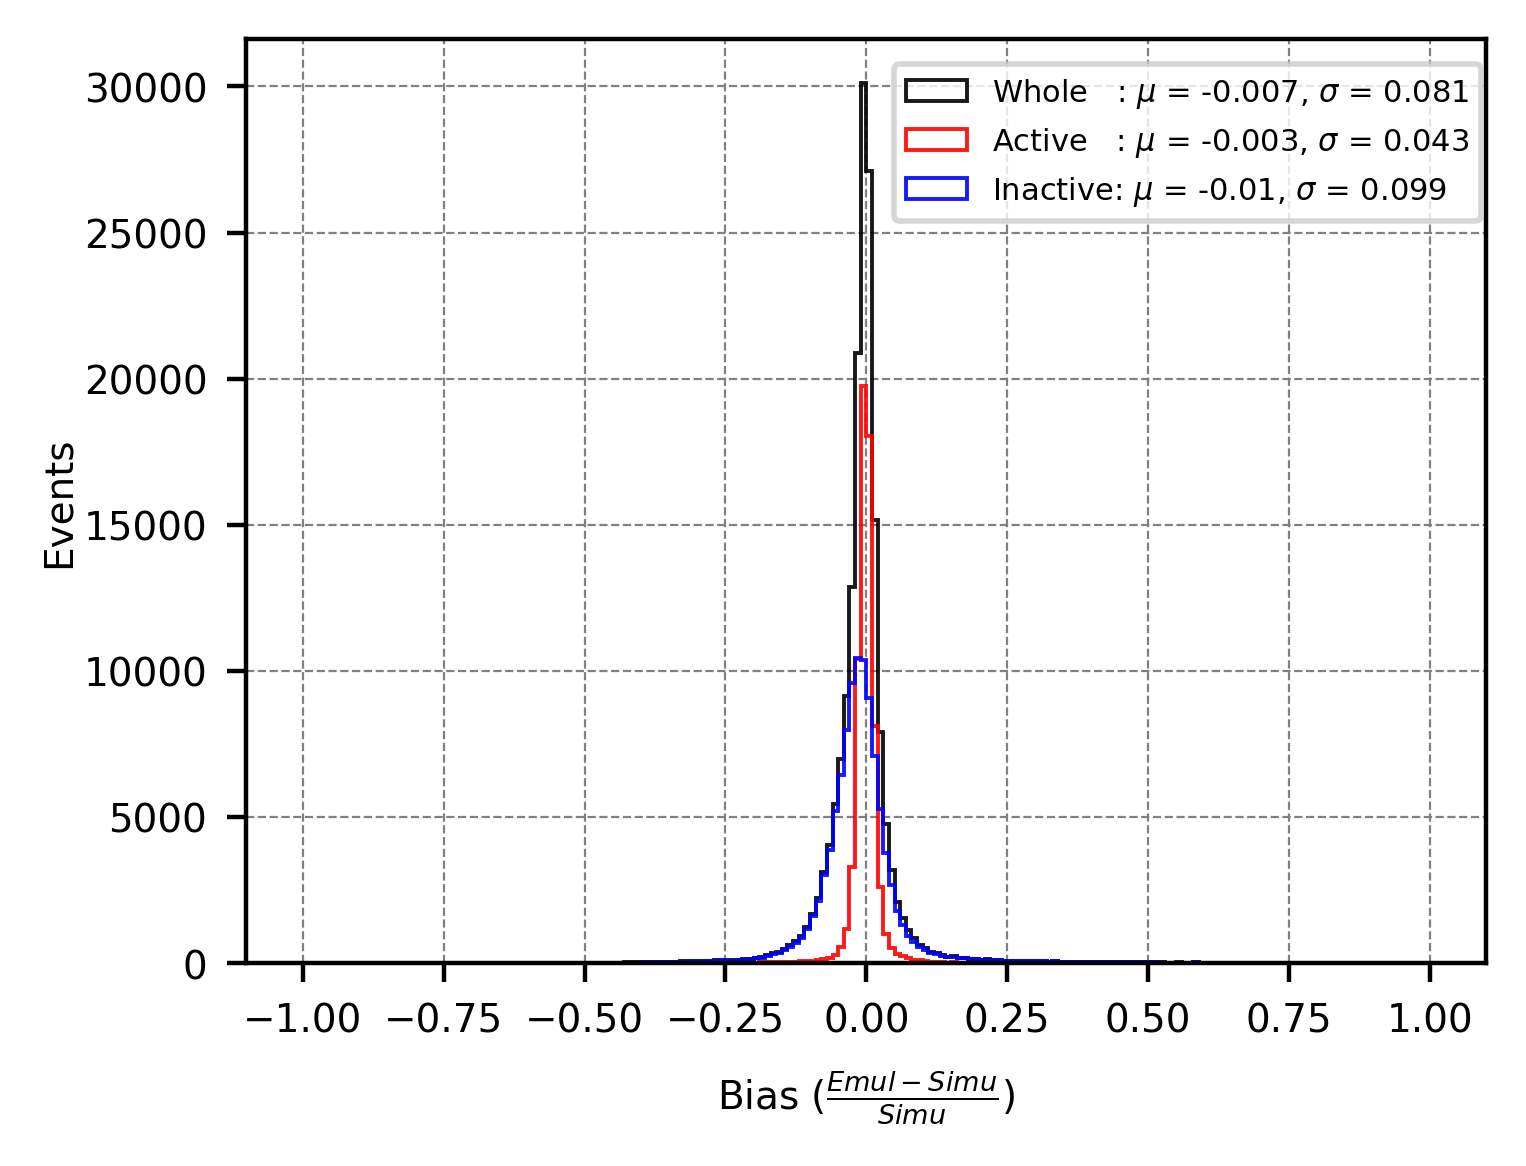

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.colors import LogNorm

plt.figure(figsize=(4,3),dpi=400)

#output statistics======================================================
active = [] #store events inside active volume---
activeNP1 = [] #active volume & bias within +-1---
inact = [] #store events out of active volume----
inactNP1 = [] # inactive volume & bias within +-1---
inactNP010 = [] # inactive volume & bias within +-0.1---

activeNP010 = [] #active volume & bias <=0.1
activeNP020 = []

activeX = [] #used to store x position of events inside field cage---
activeY = []
activeZ = []

ini_histAll = biasValues #The initial total biasValue list---
histNP1 = []
histNP010 = []

for value in ini_histAll:
    if -1 <= value <= 1:
        histNP1.append(value)
    if -0.1 <= value <= 0.1:
        histNP010.append(value)


for i in range(0, len(simuValues)):
    x = posX[i]
    y = posY[i]
    z = posZ[i]
    bias = biasValues[i]

    #Considering the thickness of apa and field cage, simply subtract by 5cm---
    if -355<x<355 and -5<y<615 and 0<z<460: #inside field cage---   
        active.append(bias)
        activeX.append(x)
        activeY.append(y)
        activeZ.append(z)
        
        if -1.0 <= bias <= 1.0:
            activeNP1.append(bias)
        if -0.1 <= bias <= 0.1:
            activeNP010.append(bias)
        if -0.2 <= bias <= 0.2:
                activeNP020.append(bias)
            
    else:
        inact.append(bias)
        
        if -1.0 <= bias <= 1.0:
            inactNP1.append(bias)
        if -0.1 <= bias <= 0.1:
            inactNP010.append(bias)

            
            
print("Total events (biasValues[]): ", len(ini_histAll))
print("Events inside active volume: ", len(active), "({:.3f}%)".format(len(active)/len(ini_histAll)*100))
print("Events out of active volume: ", len(inact), "({:.3f}%)".format(len(inact)/len(ini_histAll)*100))

print("\nWhole space & |bias|<=1  : ", len(histNP1), "({:.3f}%)".format(len(histNP1)/len(ini_histAll)*100))
print("Whole space & |bias|<=0.1: ", len(histNP010), "({:.3f}%)".format(len(histNP010)/len(ini_histAll)*100))

print("\nActive volume & |bias|<=1  : ", len(activeNP1), "({:.3f}%)".format(len(activeNP1)/len(active)*100))
print("Active volume & |bias|<=0.1: ", len(activeNP010), "({:.3f}%)".format(len(activeNP010)/len(active)*100))

print("\nInactive volume & |bias|<=1  : ", len(inactNP1), "({:.3f}%)".format(len(inactNP1)/len(inact)*100))
print("Inactive volume & |bias|<=0.1: ", len(inactNP010), "({:.3f}%)".format(len(inactNP010)/len(inact)*100))





#Drawing----------------------------------------------------------------------------
mean_ini = round(np.mean(histNP1), 3)#keep 3 decimals
std_ini = round(np.std(histNP1), 3)
plt.hist(histNP1, bins=200, range=(-1, 1), color='black', alpha=0.9, histtype='step', edgecolor='black', 
         linewidth=0.7, 
         label='Whole   : $\mu$ = {}, $\sigma$ = {}'.format(mean_ini, std_ini))

mean_activeNP1 = round(np.mean(activeNP1), 3)#keep 3 decimals
std_activeNP1 = round(np.std(activeNP1), 3)
plt.hist(activeNP1, bins=200, range=(-1, 1), color='red', alpha=0.9, histtype='step', edgecolor='red', 
         linewidth=0.7, 
         label='Active   : $\mu$ = {}, $\sigma$ = {}'.format(mean_activeNP1, std_activeNP1))

mean_inactNP1 = round(np.mean(inactNP1), 3)#keep 3 decimals
std_inactNP1 = round(np.std(inactNP1), 3)
plt.hist(inactNP1, bins=200, range=(-1, 1), color='blue', alpha=0.9, histtype='step', edgecolor='blue', 
         linewidth=0.7, 
         label='Inactive: $\mu$ = {}, $\sigma$ = {}'.format(mean_inactNP1, std_inactNP1))


plt.xlabel(r'Bias ($\frac{Emul-Simu}{Simu}$)', labelpad=5, fontsize=7)
plt.ylabel('Events', labelpad=1, fontsize=7)
#plt.title('Bias Distribution inside Active Volume', fontsize=8)

#plt.yscale('log')

plt.grid(color='gray', linestyle='--', linewidth=0.4, zorder=0)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.legend(loc='upper left', bbox_to_anchor=(0.51, 0.99), fontsize=8, markerscale=8, ncol=1, prop={'size': 5.5})

plt.show()

<br />
<br />

### Detailed analysis on simu values:

# event in [0, 100]         :  65
# event in (100, 1000]      :  5424
# event in (1000, 10000]    :  98056
# event in (10000, 100000]  :  68872
# event in (100000, 1000000]:  1686

Total event nums            :  174103

list length of [0, 100]         :  65
list length of (100, 1000]      :  5424
list length of (1000, 10000]    :  98056
list length of (10000, 100000]  :  68872
list length of (100000, 1000000]:  1686


length of groupX[ 0 ]:  65
length of groupY[ 0 ]:  65
length of groupZ[ 0 ]:  65
length of groupX[ 1 ]:  5424
length of groupY[ 1 ]:  5424
length of groupZ[ 1 ]:  5424
length of groupX[ 2 ]:  98056
length of groupY[ 2 ]:  98056
length of groupZ[ 2 ]:  98056
length of groupX[ 3 ]:  68872
length of groupY[ 3 ]:  68872
length of groupZ[ 3 ]:  68872
length of groupX[ 4 ]:  1686
length of groupY[ 4 ]:  1686
length of groupZ[ 4 ]:  1686


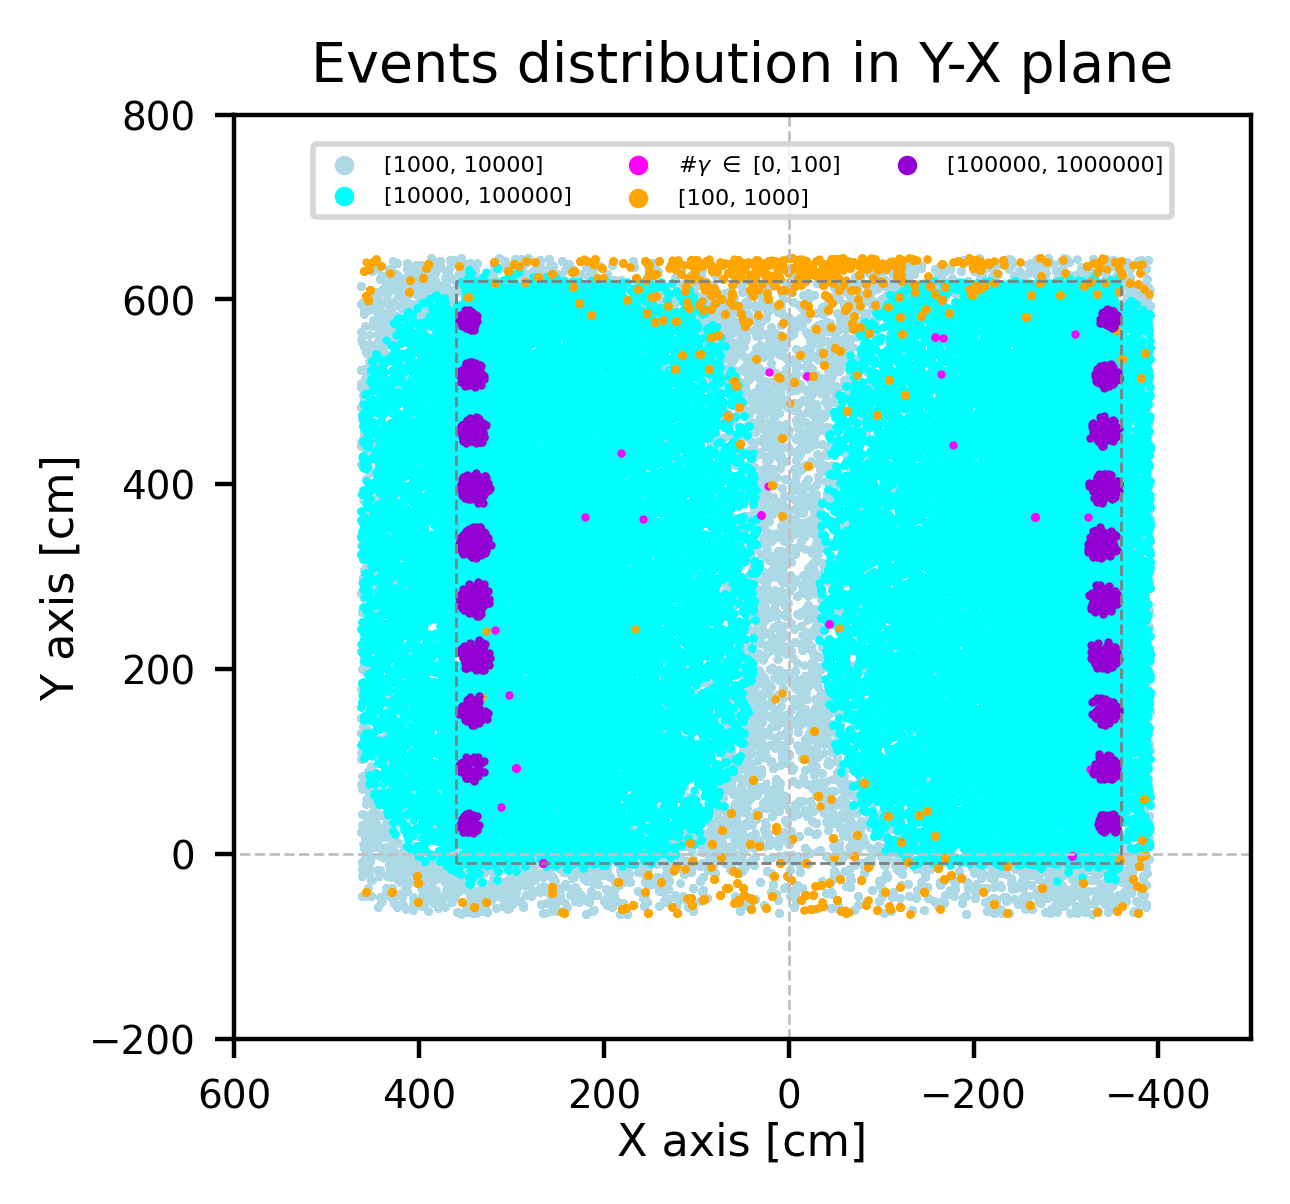

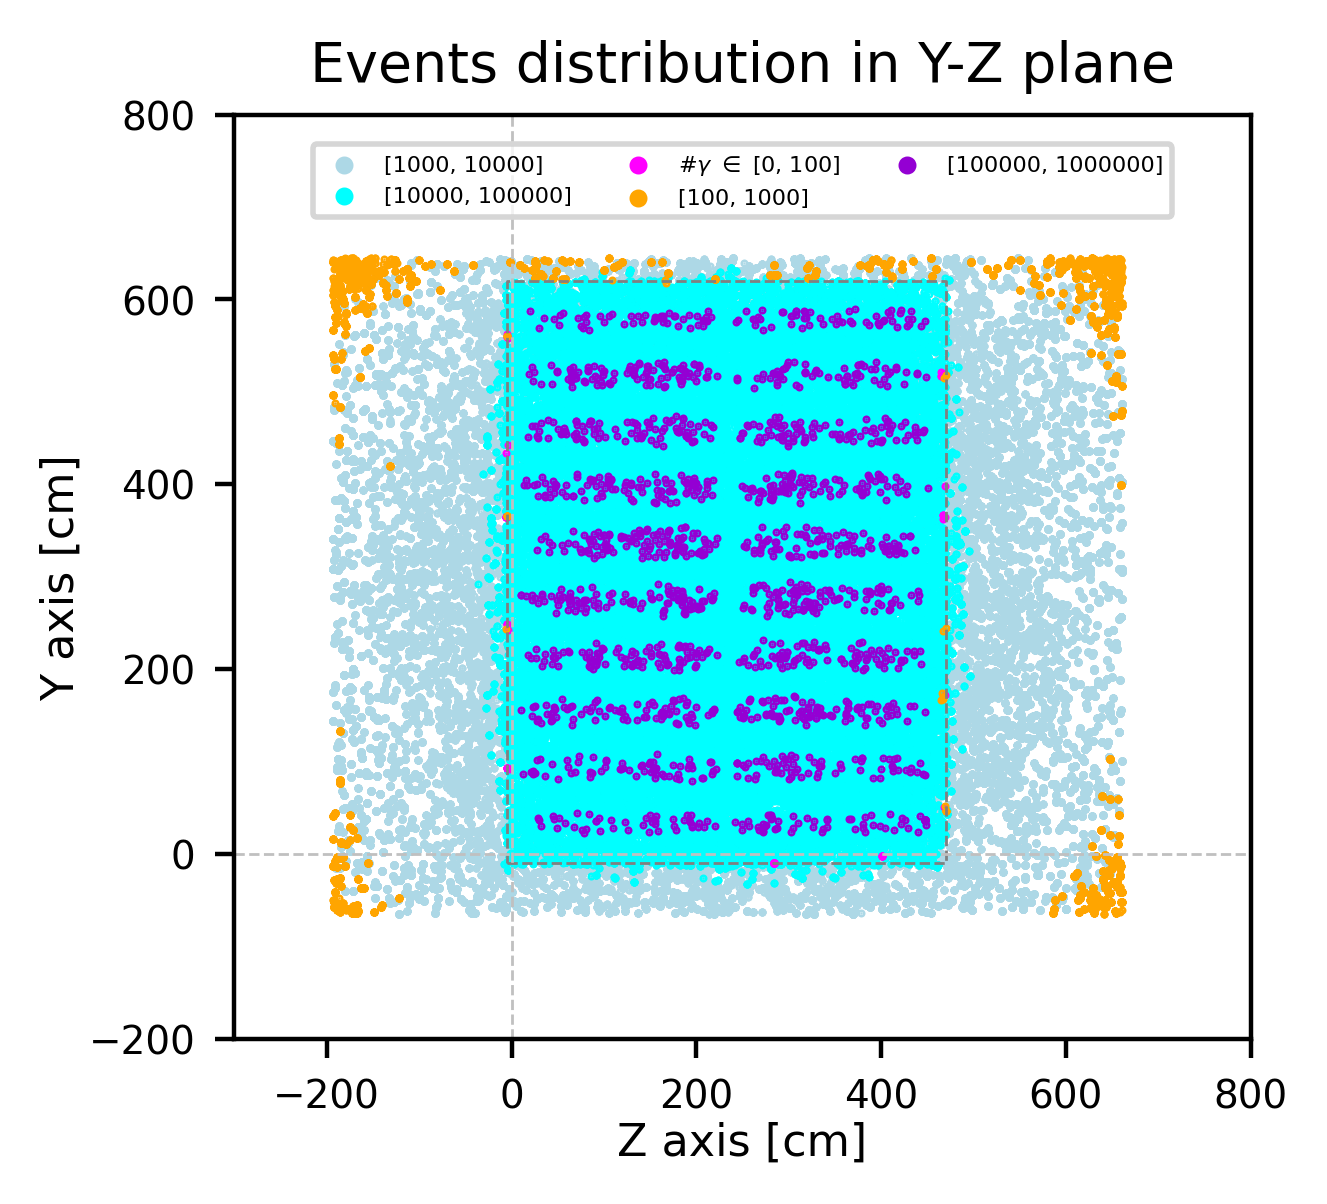

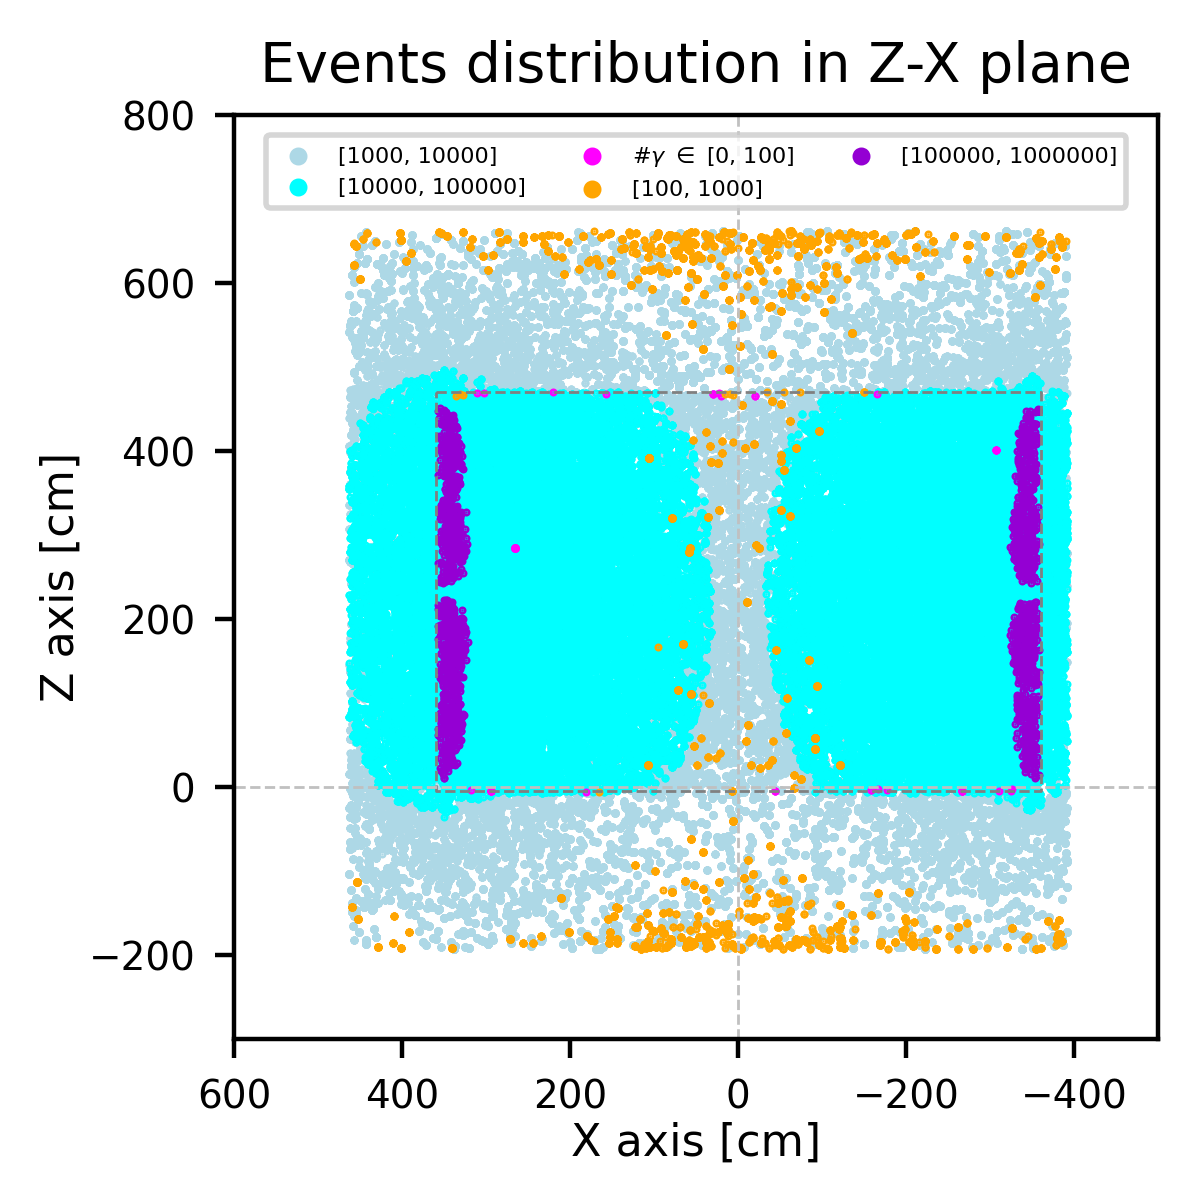

In [4]:
import matplotlib.pyplot as plt
import numpy as np

range100 = 0 #events numbers within [0, 100]
range1000 = 0 #(100, 1000]
range10000 = 0 #(1000, 10000]
range100000 = 0 #(10000, 100000]
range1000000 = 0 #(100000, 1000000]


rows = 2
list100 = [[] for _ in range(rows)]#2D list, list100[0] is label; list100[1] is photon num
list1000 = [[] for _ in range(rows)]
list10000 = [[] for _ in range(rows)]
list100000 = [[] for _ in range(rows)]
list1000000 = [[] for _ in range(rows)]


for simu in simuValues:
    if simu <= 100:
        range100 += 1
        list100[0].append(simuValues.index(simu))
        list100[1].append(simu)
    elif 100 < simu <= 1000:
        range1000 += 1
        list1000[0].append(simuValues.index(simu))
        list1000[1].append(simu)
    elif 1000 < simu <= 10000:
        range10000 += 1
        list10000[0].append(simuValues.index(simu))
        list10000[1].append(simu)
    elif 10000 < simu <= 100000:
        range100000 += 1
        list100000[0].append(simuValues.index(simu))
        list100000[1].append(simu)
    elif 100000 < simu <= 1000000:
        range1000000 += 1
        list1000000[0].append(simuValues.index(simu))
        list1000000[1].append(simu)
        
print("# event in [0, 100]         : ", range100)
print("# event in (100, 1000]      : ", range1000)
print("# event in (1000, 10000]    : ", range10000)
print("# event in (10000, 100000]  : ", range100000)
print("# event in (100000, 1000000]: ", range1000000)
totalNum = range100+range1000+range10000+range100000+range1000000
print("\nTotal event nums            : ", totalNum)

print("\nlist length of [0, 100]         : ", len(list100[1]))
print("list length of (100, 1000]      : ", len(list1000[1]))
print("list length of (1000, 10000]    : ", len(list10000[1]))
print("list length of (10000, 100000]  : ", len(list100000[1]))
print("list length of (100000, 1000000]: ", len(list1000000[1]))
#print("\nlist1000000[][]: ", list1000000)
print("\n")



#Divide posX, posY and posZ into different (5) groups---
rows = 5
groupX = [[] for _ in range(rows)]
groupY = [[] for _ in range(rows)]
groupZ = [[] for _ in range(rows)]

groupX[0] = [posX[i] for i in list100[0]]#corresponding to list100
groupX[1] = [posX[i] for i in list1000[0]]#corresponding to list1000
groupX[2] = [posX[i] for i in list10000[0]]
groupX[3] = [posX[i] for i in list100000[0]]
groupX[4] = [posX[i] for i in list1000000[0]]

groupY[0] = [posY[i] for i in list100[0]]#corresponding to list100
groupY[1] = [posY[i] for i in list1000[0]]#corresponding to list1000
groupY[2] = [posY[i] for i in list10000[0]]
groupY[3] = [posY[i] for i in list100000[0]]
groupY[4] = [posY[i] for i in list1000000[0]]

groupZ[0] = [posZ[i] for i in list100[0]]#corresponding to list100
groupZ[1] = [posZ[i] for i in list1000[0]]#corresponding to list1000
groupZ[2] = [posZ[i] for i in list10000[0]]
groupZ[3] = [posZ[i] for i in list100000[0]]
groupZ[4] = [posZ[i] for i in list1000000[0]]

for i in range(0, 5):
    print("length of groupX[",i,"]: ", len(groupX[i]))
    print("length of groupY[",i,"]: ", len(groupY[i]))
    print("length of groupZ[",i,"]: ", len(groupZ[i]))



    
    
    
    
    

#Start drawing figures======================================    
#Set the limts of x, y and z when drawing---
xmin = -500
xmax = 600
ymin = -200
ymax = 800
zmin = -300
zmax = 800

#Y-X plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


# Define the field cage frame, start from top right, anti-clockwise---
cageXY_y = [-10, 620, 620, -10, -10]
cageXY_x = [360, 360, -360, -360, 360]
plt.plot(cageXY_x, cageXY_y, color="grey", linewidth=0.5, linestyle='--')

#Draw the membrane XArapucas---
#plt.plot([418, 418], [272, 332], color="grey", linewidth=0.5, linestyle='-')
#plt.plot([-418, -418], [272, 332], color="grey", linewidth=0.5, linestyle='-')
#plt.plot([418, 418], [256, 196], color="grey", linewidth=0.5, linestyle='-')
#plt.plot([-418, -418], [256, 196], color="grey", linewidth=0.5, linestyle='-')
#plt.plot([418, 418], [-177, -237], color="grey", linewidth=0.5, linestyle='-')
#plt.plot([-418, -418], [-177, -237], color="grey", linewidth=0.5, linestyle='-')
#plt.plot([418, 418], [-253, -313], color="grey", linewidth=0.5, linestyle='-')
#plt.plot([-418, -418], [-253, -313], color="grey", linewidth=0.5, linestyle='-')

#Set equal scaling for both axes---
plt.axis('scaled')
plt.xlim(xmin, xmax)#Since in x-y plane, x axis is y of the geometry---
plt.ylim(ymin, ymax)

#auxiliary line, along y(geo) and x axis---
yauxi1 = [ymin, ymax]
yauxi2 = [0, 0]
plt.plot(yauxi2, yauxi1, color="silver", linewidth=0.5, linestyle='--')
xauxi1 = [0, 0]
xauxi2 = [xmin, xmax]
plt.plot(xauxi2, xauxi1, color="silver", linewidth=0.5, linestyle='--')

#Drawing of data points------
plt.scatter(groupX[2], groupY[2], c='lightblue', s=1.0, alpha=1.0, marker='.', label='[1000, 10000]')
plt.scatter(groupX[3], groupY[3], c='cyan', s=1.0, alpha=1.0, marker='.', label='[10000, 100000]')
plt.scatter(groupX[0], groupY[0], c='magenta', s=1.0, alpha=1.0, marker='.', label='#$\gamma$ $\in$ [0, 100]')
plt.scatter(groupX[1], groupY[1], c='orange', s=1.0, alpha=1.0, marker='.', label='[100, 1000]')
plt.scatter(groupX[4], groupY[4], c='darkviolet', s=1.0, alpha=1.0, marker='.', label='[100000, 1000000]')


plt.xlabel('X axis [cm]', labelpad=1, fontsize=8)
plt.gca().invert_xaxis()
plt.ylabel('Y axis [cm]', labelpad=1, fontsize=8)
plt.title('Events distribution in Y-X plane', fontsize=10)
plt.tick_params(labelsize=7)#set the size of ticks---
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('simu_YX.png')
plt.show()    
#---------------------------------------------------------





#Y-Z plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


# Define the field cage frame, start from top right, anti-clockwise---
cageXZ_z = [-5, 470, 470, -5, -5]
cageXZ_y = [-10, -10, 620, 620, -10]
plt.plot(cageXZ_z, cageXZ_y, color="grey", linewidth=0.5, linestyle='--')

#auxiliary line, along y(geo) and x axis---
yauxi3 = [ymin, ymax]
yauxi4 = [0, 0]
plt.plot(yauxi4, yauxi3, color="silver", linewidth=0.5, linestyle='--')
xauxi3 = [0, 0]
xauxi4 = [zmin, zmax]
plt.plot(xauxi4, xauxi3, color="silver", linewidth=0.5, linestyle='--')

#Draw the membrane XArapucas---
op00z = [180, 120, 120, 180, 180]#From top right, anti-clockwise---
op00x = [332, 332, 272, 272, 332]
#plt.plot(op00z, op00x, color="grey", linewidth=0.5, linestyle='-')
op02z = op00z
op02x = [256, 256, 196, 196, 256]
#plt.plot(op02z, op02x, color="grey", linewidth=0.5, linestyle='-')
op16z = op00z
op16x = [-177, -177, -237, -237, -177]
#plt.plot(op16z, op16x, color="grey", linewidth=0.5, linestyle='-')
op22z = op00z
op22x = [-253, -253, -313, -313, -253]
#plt.plot(op22z, op22x, color="grey", linewidth=0.5, linestyle='-')


#Drawing of data points------
plt.scatter(groupZ[2], groupY[2], c='lightblue', s=0.8, alpha=1.0, marker='.', label='[1000, 10000]')
plt.scatter(groupZ[3], groupY[3], c='cyan', s=0.8, alpha=1.0, marker='.', label='[10000, 100000]')
plt.scatter(groupZ[0], groupY[0], c='magenta', s=0.8, alpha=1.0, marker='.', label='#$\gamma$ $\in$ [0, 100]')
plt.scatter(groupZ[1], groupY[1], c='orange', s=0.8, alpha=1.0, marker='.', label='[100, 1000]')
plt.scatter(groupZ[4], groupY[4], c='darkviolet', s=0.8, alpha=1.0, marker='.', label='[100000, 1000000]')


plt.axis('scaled')
plt.xlim(zmin, zmax)
plt.ylim(ymin, ymax)
plt.xlabel('Z axis [cm]', labelpad=1, fontsize=8)
plt.ylabel('Y axis [cm]', labelpad=1, fontsize=8)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.title('Events distribution in Y-Z plane', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('simu_YZ.png')
plt.show()    
#---------------------------------------------------------






#Z-X plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


# Define the field cage frame, start from top right, anti-clockwise---
cageZY_x = [360, -360, -360, 360, 360]
cageZY_z = [470, 470, -5, -5, 470]
plt.plot(cageZY_x, cageZY_z, color="grey", linewidth=0.5, linestyle='--')

#auxiliary line, along y(geo) axis---
yauxi5 = [zmin, zmax]
yauxi6 = [0, 0]
plt.plot(yauxi6, yauxi5, color="silver", linewidth=0.5, linestyle='--')
xauxi5= [0, 0]
xauxi6 = [xmin, xmax]
plt.plot(xauxi6, xauxi5, color="silver", linewidth=0.5, linestyle='--')

#Draw the membrane XArapucas---
#plt.plot([418, 418], [120, 180], color="grey", linewidth=0.5, linestyle='-')#opch0, 2, 16, 22---
#plt.plot([-418, -418], [120, 180], color="grey", linewidth=0.5, linestyle='-')#opch1, 3, 17, 23---
op04y = [236, 176, 176, 236, 236]#From top right, anti-clockwise---
op04z = [288, 288, 228, 228, 288]
#plt.plot(op04y, op04z, color="grey", linewidth=0.5, linestyle='-')
op05y = [-101, -161, -161, -101, -101]#From top right, anti-clockwise---
op05z = [288, 288, 228, 228, 288]
#plt.plot(op05y, op05z, color="grey", linewidth=0.5, linestyle='-')
op06y = [69, 9, 9, 69, 69]#From top right, anti-clockwise---
op06z = [217, 217, 157, 157, 217]
#plt.plot(op06y, op06z, color="grey", linewidth=0.5, linestyle='-')
op07y = [-270, -330, -330, -270, -270]#From top right, anti-clockwise---
op07z = [217, 217, 157, 157, 217]
#plt.plot(op07y, op07z, color="grey", linewidth=0.5, linestyle='-')
op08y = op04y#From top right, anti-clockwise---
op08z = [142, 142, 82, 82, 142]
#plt.plot(op08y, op08z, color="grey", linewidth=0.5, linestyle='-')
op09y = [-9, -69, -69, -9, -9]#From top right, anti-clockwise---
op09z = [142, 142, 82, 82, 142]
#plt.plot(op09y, op09z, color="grey", linewidth=0.5, linestyle='-')
op10y = [161, 101, 101, 161, 161]#From top right, anti-clockwise---
op10z = [71, 71, 11, 11, 71]
#plt.plot(op10y, op10z, color="grey", linewidth=0.5, linestyle='-')
op11y = [-176, -236, -236, -176, -176]#From top right, anti-clockwise---
op11z = [71, 71, 11, 11, 71]
#plt.plot(op11y, op11z, color="grey", linewidth=0.5, linestyle='-')


#Drawing of data points------
plt.scatter(groupX[2], groupZ[2], c='lightblue', s=0.8, alpha=1.0, marker='.', label='[1000, 10000]')
plt.scatter(groupX[3], groupZ[3], c='cyan', s=0.8, alpha=1.0, marker='.', label='[10000, 100000]')
plt.scatter(groupX[0], groupZ[0], c='magenta', s=0.8, alpha=1.0, marker='.', label='#$\gamma$ $\in$ [0, 100]')
plt.scatter(groupX[1], groupZ[1], c='orange', s=0.8, alpha=1.0, marker='.', label='[100, 1000]')
plt.scatter(groupX[4], groupZ[4], c='darkviolet', s=0.8, alpha=1.0, marker='.', label='[100000, 1000000]')


plt.axis('scaled')
plt.xlim(xmin, xmax)
plt.ylim(zmin, zmax)
plt.xlabel('X axis [cm]', labelpad=1, fontsize=8)
plt.gca().invert_xaxis()
plt.ylabel('Z axis [cm]', labelpad=1, fontsize=8)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.title('Events distribution in Z-X plane', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('simu_ZX.png')
plt.show()    
#---------------------------------------------------------








<br />
<br />

### Detailed analysis on emul values:

# event in [0, 100]         :  0
# event in (100, 1000]      :  5855
# event in (1000, 10000]    :  97617
# event in (10000, 100000]  :  69139
# event in (100000, 1000000]:  1492

Total event nums            :  174103

list length of [0, 100]         :  0
list length of (100, 1000]      :  5855
list length of (1000, 10000]    :  97617
list length of (10000, 100000]  :  69139
list length of (100000, 1000000]:  1492


length of groupX[ 0 ]:  0
length of groupY[ 0 ]:  0
length of groupZ[ 0 ]:  0
length of groupX[ 1 ]:  5855
length of groupY[ 1 ]:  5855
length of groupZ[ 1 ]:  5855
length of groupX[ 2 ]:  97617
length of groupY[ 2 ]:  97617
length of groupZ[ 2 ]:  97617
length of groupX[ 3 ]:  69139
length of groupY[ 3 ]:  69139
length of groupZ[ 3 ]:  69139
length of groupX[ 4 ]:  1492
length of groupY[ 4 ]:  1492
length of groupZ[ 4 ]:  1492


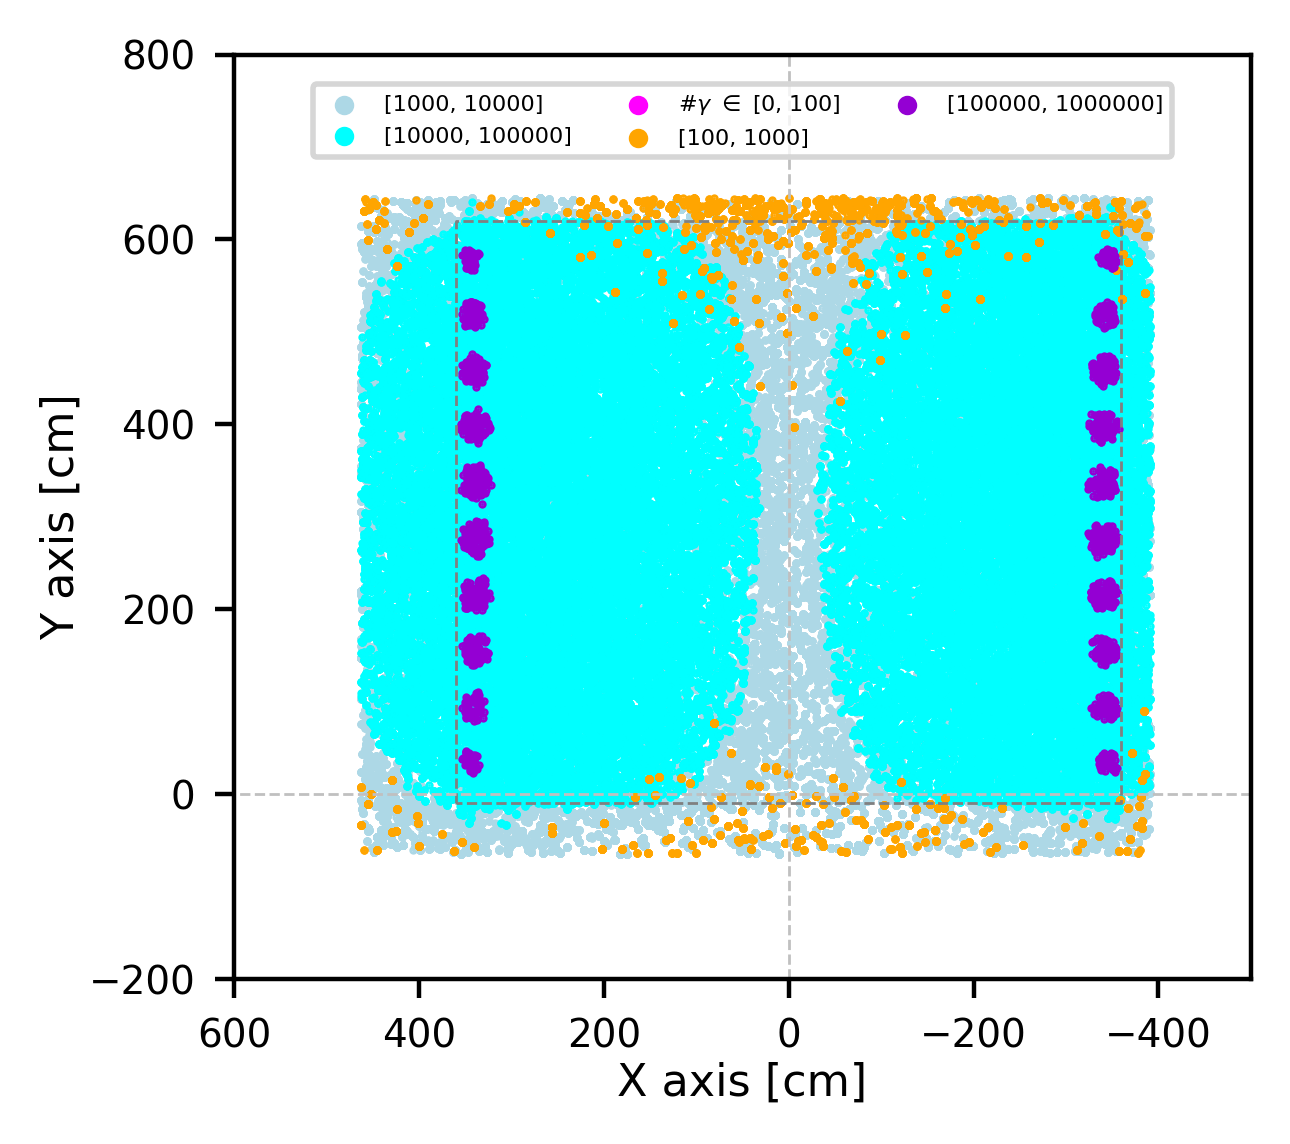

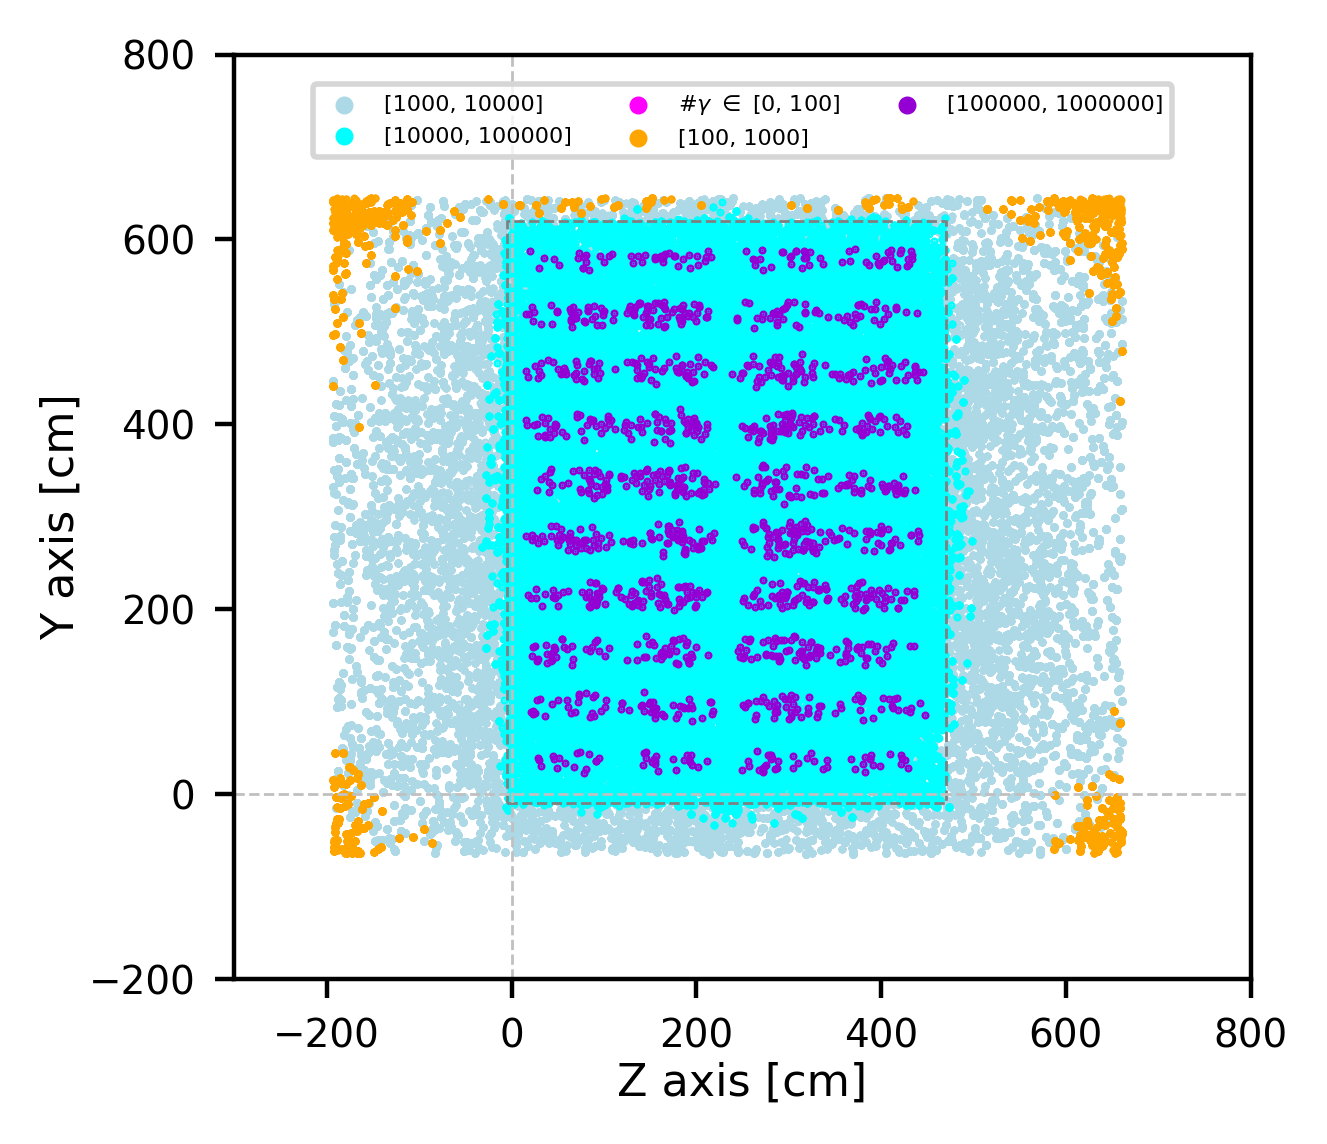

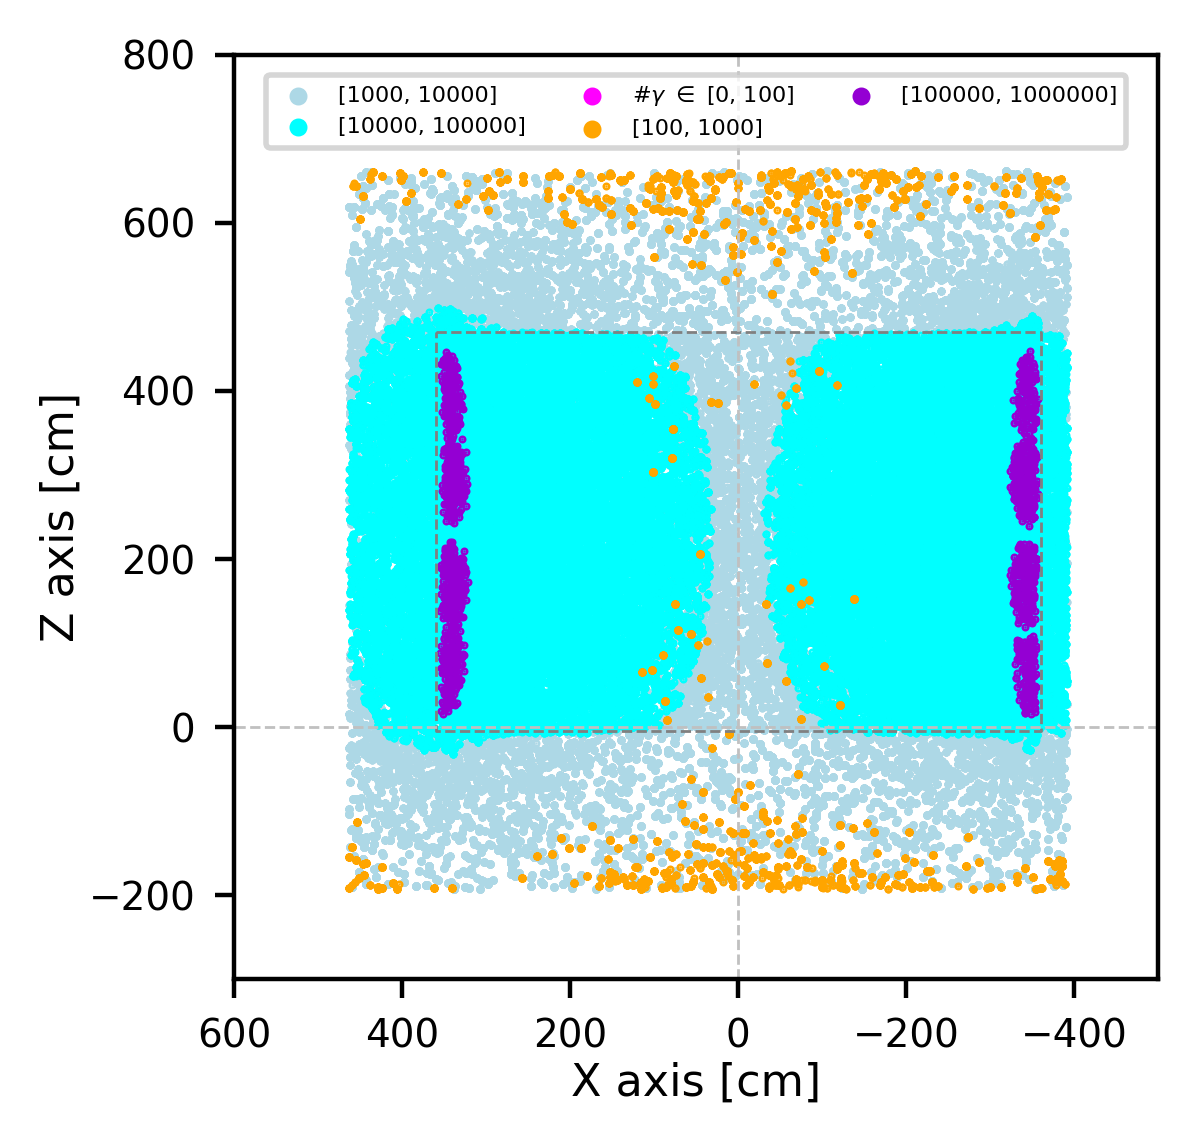

In [6]:
import matplotlib.pyplot as plt
import numpy as np

range100 = 0 #events numbers within [0, 100]
range1000 = 0 #(100, 1000]
range10000 = 0 #(1000, 10000]
range100000 = 0 #(10000, 100000]
range1000000 = 0 #(100000, 1000000]


rows = 2
list100 = [[] for _ in range(rows)]#2D list, list100[0] is label; list100[1] is photon num
list1000 = [[] for _ in range(rows)]
list10000 = [[] for _ in range(rows)]
list100000 = [[] for _ in range(rows)]
list1000000 = [[] for _ in range(rows)]


for simu in emulValues:
    if simu <= 100:
        range100 += 1
        list100[0].append(emulValues.index(simu))
        list100[1].append(simu)
    elif 100 < simu <= 1000:
        range1000 += 1
        list1000[0].append(emulValues.index(simu))
        list1000[1].append(simu)
    elif 1000 < simu <= 10000:
        range10000 += 1
        list10000[0].append(emulValues.index(simu))
        list10000[1].append(simu)
    elif 10000 < simu <= 100000:
        range100000 += 1
        list100000[0].append(emulValues.index(simu))
        list100000[1].append(simu)
    elif 100000 < simu <= 1000000:
        range1000000 += 1
        list1000000[0].append(emulValues.index(simu))
        list1000000[1].append(simu)
        
print("# event in [0, 100]         : ", range100)
print("# event in (100, 1000]      : ", range1000)
print("# event in (1000, 10000]    : ", range10000)
print("# event in (10000, 100000]  : ", range100000)
print("# event in (100000, 1000000]: ", range1000000)
totalNum = range100+range1000+range10000+range100000+range1000000
print("\nTotal event nums            : ", totalNum)

print("\nlist length of [0, 100]         : ", len(list100[1]))
print("list length of (100, 1000]      : ", len(list1000[1]))
print("list length of (1000, 10000]    : ", len(list10000[1]))
print("list length of (10000, 100000]  : ", len(list100000[1]))
print("list length of (100000, 1000000]: ", len(list1000000[1]))
#print("\nlist1000000[][]: ", list1000000)
print("\n")



#Divide posX, posY and posZ into different (5) groups---
rows = 5
groupX = [[] for _ in range(rows)]
groupY = [[] for _ in range(rows)]
groupZ = [[] for _ in range(rows)]

groupX[0] = [posX[i] for i in list100[0]]#corresponding to list100
groupX[1] = [posX[i] for i in list1000[0]]#corresponding to list1000
groupX[2] = [posX[i] for i in list10000[0]]
groupX[3] = [posX[i] for i in list100000[0]]
groupX[4] = [posX[i] for i in list1000000[0]]

groupY[0] = [posY[i] for i in list100[0]]#corresponding to list100
groupY[1] = [posY[i] for i in list1000[0]]#corresponding to list1000
groupY[2] = [posY[i] for i in list10000[0]]
groupY[3] = [posY[i] for i in list100000[0]]
groupY[4] = [posY[i] for i in list1000000[0]]

groupZ[0] = [posZ[i] for i in list100[0]]#corresponding to list100
groupZ[1] = [posZ[i] for i in list1000[0]]#corresponding to list1000
groupZ[2] = [posZ[i] for i in list10000[0]]
groupZ[3] = [posZ[i] for i in list100000[0]]
groupZ[4] = [posZ[i] for i in list1000000[0]]

for i in range(0, 5):
    print("length of groupX[",i,"]: ", len(groupX[i]))
    print("length of groupY[",i,"]: ", len(groupY[i]))
    print("length of groupZ[",i,"]: ", len(groupZ[i]))



    
    
    
    
    

#Start drawing figures======================================    
#Set the limts of x, y and z when drawing---
xmin = -500
xmax = 600
ymin = -200
ymax = 800
zmin = -300
zmax = 800

#Y-X plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


# Define the field cage frame, start from top right, anti-clockwise---
cageXY_y = [-10, 620, 620, -10, -10]
cageXY_x = [360, 360, -360, -360, 360]
plt.plot(cageXY_x, cageXY_y, color="grey", linewidth=0.5, linestyle='--')

#Draw the membrane XArapucas---
#plt.plot([418, 418], [272, 332], color="grey", linewidth=0.5, linestyle='-')
#plt.plot([-418, -418], [272, 332], color="grey", linewidth=0.5, linestyle='-')
#plt.plot([418, 418], [256, 196], color="grey", linewidth=0.5, linestyle='-')
#plt.plot([-418, -418], [256, 196], color="grey", linewidth=0.5, linestyle='-')
#plt.plot([418, 418], [-177, -237], color="grey", linewidth=0.5, linestyle='-')
#plt.plot([-418, -418], [-177, -237], color="grey", linewidth=0.5, linestyle='-')
#plt.plot([418, 418], [-253, -313], color="grey", linewidth=0.5, linestyle='-')
#plt.plot([-418, -418], [-253, -313], color="grey", linewidth=0.5, linestyle='-')

#Set equal scaling for both axes---
plt.axis('scaled')
plt.xlim(xmin, xmax)#Since in x-y plane, x axis is y of the geometry---
plt.ylim(ymin, ymax)

#auxiliary line, along y(geo) and x axis---
yauxi1 = [ymin, ymax]
yauxi2 = [0, 0]
plt.plot(yauxi2, yauxi1, color="silver", linewidth=0.5, linestyle='--')
xauxi1 = [0, 0]
xauxi2 = [xmin, xmax]
plt.plot(xauxi2, xauxi1, color="silver", linewidth=0.5, linestyle='--')

#Drawing of data points------
plt.scatter(groupX[2], groupY[2], c='lightblue', s=1.0, alpha=1.0, marker='.', label='[1000, 10000]')
plt.scatter(groupX[3], groupY[3], c='cyan', s=1.0, alpha=1.0, marker='.', label='[10000, 100000]')
plt.scatter(groupX[0], groupY[0], c='magenta', s=1.0, alpha=1.0, marker='.', label='#$\gamma$ $\in$ [0, 100]')
plt.scatter(groupX[1], groupY[1], c='orange', s=1.0, alpha=1.0, marker='.', label='[100, 1000]')
plt.scatter(groupX[4], groupY[4], c='darkviolet', s=1.0, alpha=1.0, marker='.', label='[100000, 1000000]')


plt.xlabel('X axis [cm]', labelpad=1, fontsize=8)
plt.gca().invert_xaxis()
plt.ylabel('Y axis [cm]', labelpad=1, fontsize=8)
#plt.title('Events distribution in Y-X plane', fontsize=10)
plt.tick_params(labelsize=7)#set the size of ticks---
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('simu_YX.png')
plt.show()    
#---------------------------------------------------------





#Y-Z plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


# Define the field cage frame, start from top right, anti-clockwise---
cageXZ_z = [-5, 470, 470, -5, -5]
cageXZ_y = [-10, -10, 620, 620, -10]
plt.plot(cageXZ_z, cageXZ_y, color="grey", linewidth=0.5, linestyle='--')

#auxiliary line, along y(geo) and x axis---
yauxi3 = [ymin, ymax]
yauxi4 = [0, 0]
plt.plot(yauxi4, yauxi3, color="silver", linewidth=0.5, linestyle='--')
xauxi3 = [0, 0]
xauxi4 = [zmin, zmax]
plt.plot(xauxi4, xauxi3, color="silver", linewidth=0.5, linestyle='--')

#Draw the membrane XArapucas---
op00z = [180, 120, 120, 180, 180]#From top right, anti-clockwise---
op00x = [332, 332, 272, 272, 332]
#plt.plot(op00z, op00x, color="grey", linewidth=0.5, linestyle='-')
op02z = op00z
op02x = [256, 256, 196, 196, 256]
#plt.plot(op02z, op02x, color="grey", linewidth=0.5, linestyle='-')
op16z = op00z
op16x = [-177, -177, -237, -237, -177]
#plt.plot(op16z, op16x, color="grey", linewidth=0.5, linestyle='-')
op22z = op00z
op22x = [-253, -253, -313, -313, -253]
#plt.plot(op22z, op22x, color="grey", linewidth=0.5, linestyle='-')


#Drawing of data points------
plt.scatter(groupZ[2], groupY[2], c='lightblue', s=0.8, alpha=1.0, marker='.', label='[1000, 10000]')
plt.scatter(groupZ[3], groupY[3], c='cyan', s=0.8, alpha=1.0, marker='.', label='[10000, 100000]')
plt.scatter(groupZ[0], groupY[0], c='magenta', s=0.8, alpha=1.0, marker='.', label='#$\gamma$ $\in$ [0, 100]')
plt.scatter(groupZ[1], groupY[1], c='orange', s=0.8, alpha=1.0, marker='.', label='[100, 1000]')
plt.scatter(groupZ[4], groupY[4], c='darkviolet', s=0.8, alpha=1.0, marker='.', label='[100000, 1000000]')


plt.axis('scaled')
plt.xlim(zmin, zmax)
plt.ylim(ymin, ymax)
plt.xlabel('Z axis [cm]', labelpad=1, fontsize=8)
plt.ylabel('Y axis [cm]', labelpad=1, fontsize=8)
plt.tick_params(labelsize=7)#set the size of ticks---

#plt.title('Events distribution in Y-Z plane', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('simu_YZ.png')
plt.show()    
#---------------------------------------------------------






#Z-X plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


# Define the field cage frame, start from top right, anti-clockwise---
cageZY_x = [360, -360, -360, 360, 360]
cageZY_z = [470, 470, -5, -5, 470]
plt.plot(cageZY_x, cageZY_z, color="grey", linewidth=0.5, linestyle='--')

#auxiliary line, along y(geo) axis---
yauxi5 = [zmin, zmax]
yauxi6 = [0, 0]
plt.plot(yauxi6, yauxi5, color="silver", linewidth=0.5, linestyle='--')
xauxi5= [0, 0]
xauxi6 = [xmin, xmax]
plt.plot(xauxi6, xauxi5, color="silver", linewidth=0.5, linestyle='--')

#Draw the membrane XArapucas---
#plt.plot([418, 418], [120, 180], color="grey", linewidth=0.5, linestyle='-')#opch0, 2, 16, 22---
#plt.plot([-418, -418], [120, 180], color="grey", linewidth=0.5, linestyle='-')#opch1, 3, 17, 23---
op04y = [236, 176, 176, 236, 236]#From top right, anti-clockwise---
op04z = [288, 288, 228, 228, 288]
#plt.plot(op04y, op04z, color="grey", linewidth=0.5, linestyle='-')
op05y = [-101, -161, -161, -101, -101]#From top right, anti-clockwise---
op05z = [288, 288, 228, 228, 288]
#plt.plot(op05y, op05z, color="grey", linewidth=0.5, linestyle='-')
op06y = [69, 9, 9, 69, 69]#From top right, anti-clockwise---
op06z = [217, 217, 157, 157, 217]
#plt.plot(op06y, op06z, color="grey", linewidth=0.5, linestyle='-')
op07y = [-270, -330, -330, -270, -270]#From top right, anti-clockwise---
op07z = [217, 217, 157, 157, 217]
#plt.plot(op07y, op07z, color="grey", linewidth=0.5, linestyle='-')
op08y = op04y#From top right, anti-clockwise---
op08z = [142, 142, 82, 82, 142]
#plt.plot(op08y, op08z, color="grey", linewidth=0.5, linestyle='-')
op09y = [-9, -69, -69, -9, -9]#From top right, anti-clockwise---
op09z = [142, 142, 82, 82, 142]
#plt.plot(op09y, op09z, color="grey", linewidth=0.5, linestyle='-')
op10y = [161, 101, 101, 161, 161]#From top right, anti-clockwise---
op10z = [71, 71, 11, 11, 71]
#plt.plot(op10y, op10z, color="grey", linewidth=0.5, linestyle='-')
op11y = [-176, -236, -236, -176, -176]#From top right, anti-clockwise---
op11z = [71, 71, 11, 11, 71]
#plt.plot(op11y, op11z, color="grey", linewidth=0.5, linestyle='-')


#Drawing of data points------
plt.scatter(groupX[2], groupZ[2], c='lightblue', s=0.8, alpha=1.0, marker='.', label='[1000, 10000]')
plt.scatter(groupX[3], groupZ[3], c='cyan', s=0.8, alpha=1.0, marker='.', label='[10000, 100000]')
plt.scatter(groupX[0], groupZ[0], c='magenta', s=0.8, alpha=1.0, marker='.', label='#$\gamma$ $\in$ [0, 100]')
plt.scatter(groupX[1], groupZ[1], c='orange', s=0.8, alpha=1.0, marker='.', label='[100, 1000]')
plt.scatter(groupX[4], groupZ[4], c='darkviolet', s=0.8, alpha=1.0, marker='.', label='[100000, 1000000]')


plt.axis('scaled')
plt.xlim(xmin, xmax)
plt.ylim(zmin, zmax)
plt.xlabel('X axis [cm]', labelpad=1, fontsize=8)
plt.gca().invert_xaxis()
plt.ylabel('Z axis [cm]', labelpad=1, fontsize=8)
plt.tick_params(labelsize=7)#set the size of ticks---

#plt.title('Events distribution in Z-X plane', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('simu_ZX.png')
plt.show()    
#---------------------------------------------------------








<br />
<br />
<br />
<br />

### (Simu vs Emul), (Simu vs Bias) plots:

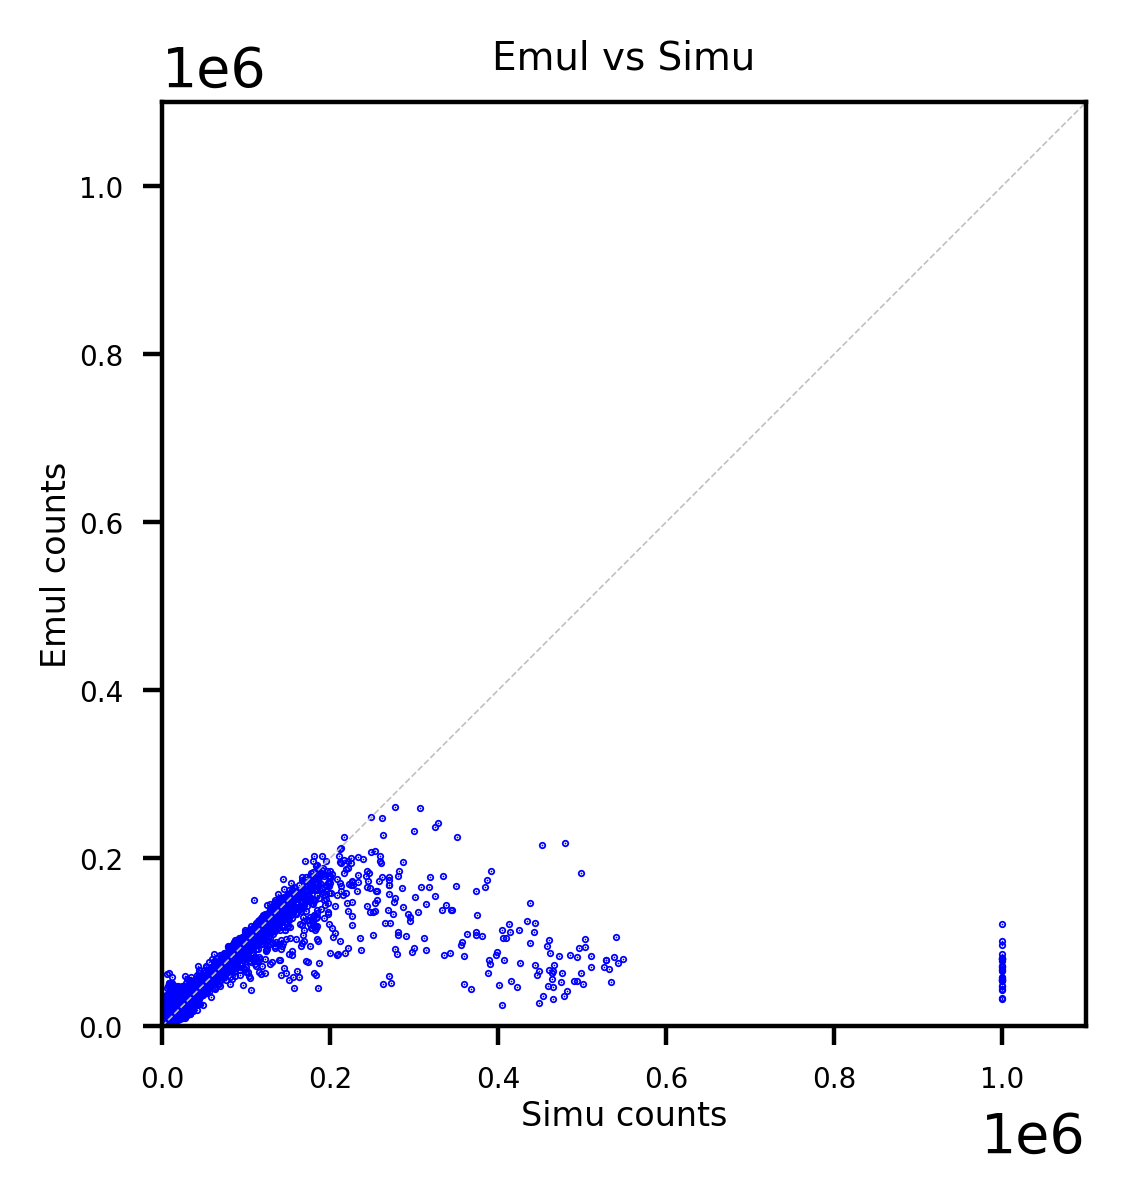

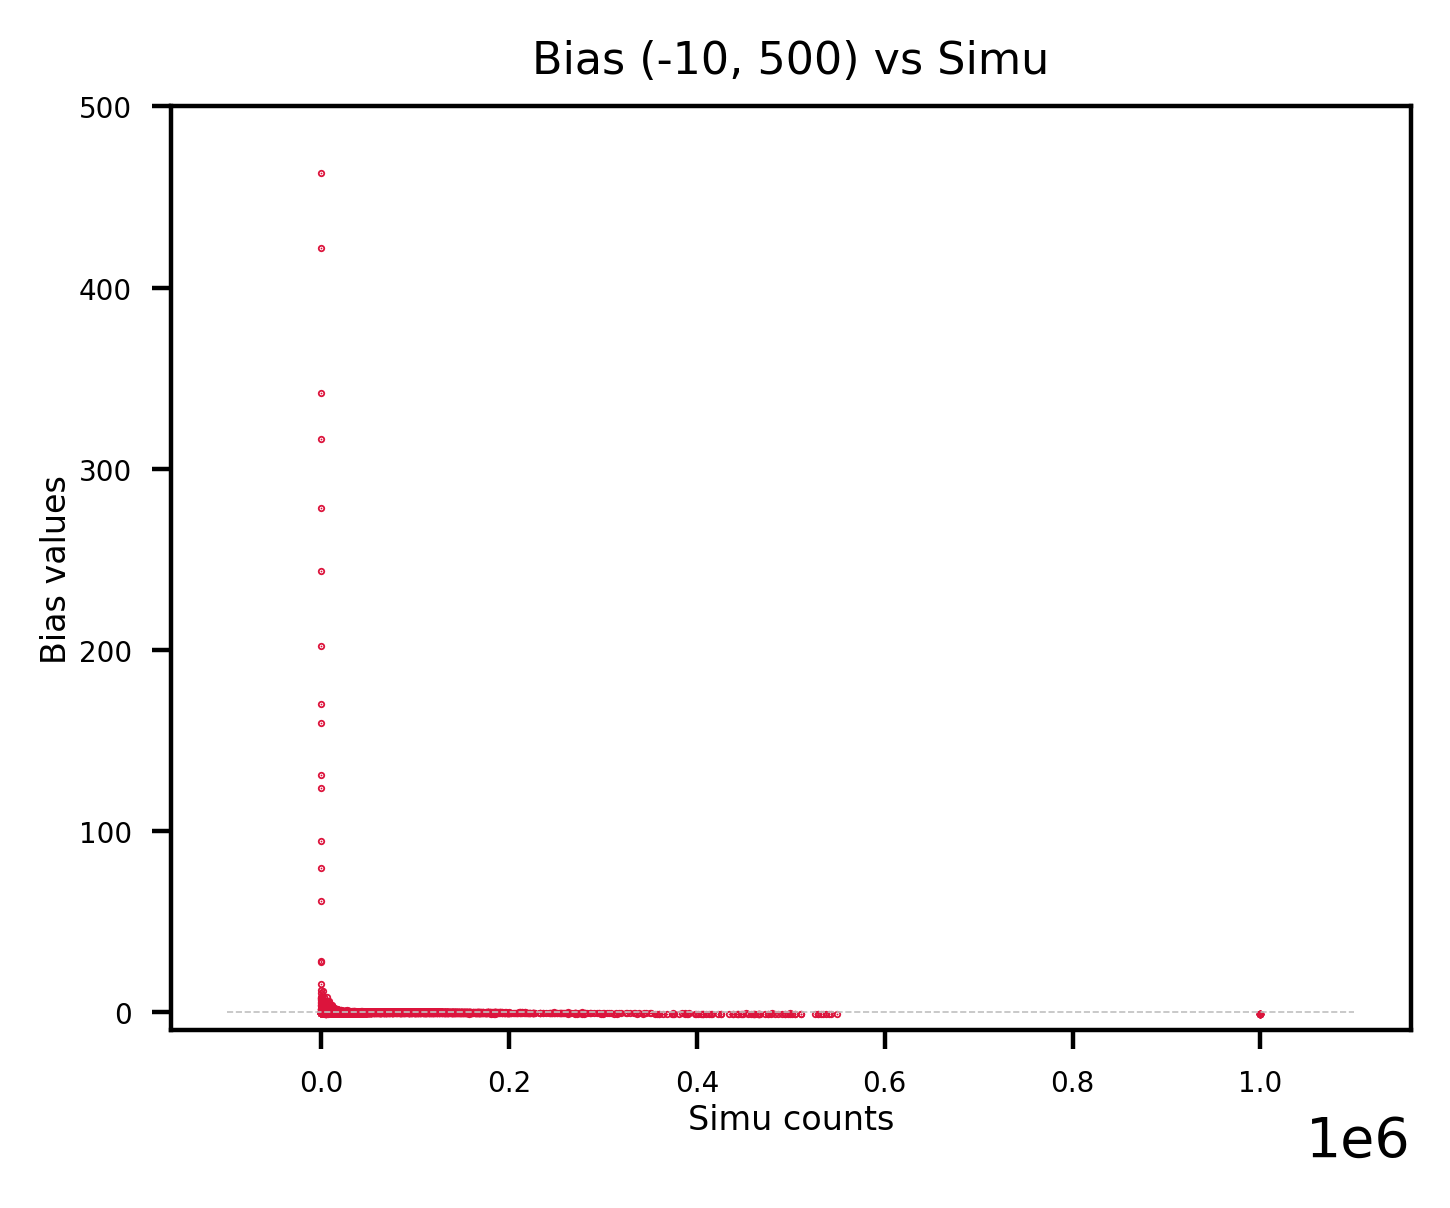

In [8]:
import matplotlib.pyplot as plt
import numpy as np


#Bias vs Simu==========================================================
plt.figure(figsize=(4,3),dpi=400)

#y=x---
plt.plot([0, 1100000], [0, 1100000], color="silver", linewidth=0.3, linestyle='--')


#plt.plot([200000, 600000, 600000, 200000, 200000], [0, 0, 80000, 80000, 0], color="green", linewidth=0.8, linestyle='-')
#plt.plot([200000, 600000, 600000, 200000, 200000], [90000, 90000, 250000, 250000, 90000], 
#         color="violet", linewidth=0.8, linestyle='-')

#Drawing of data points------
plt.scatter(simuValues, emulValues, c='blue', s=0.4, alpha=1.0, marker='.', label='[1000, 10000]')

plt.axis('scaled')
plt.xlim(0, 1100000)
plt.ylim(0, 1100000)
plt.xlabel('Simu counts', labelpad=1, fontsize=6)
plt.ylabel('Emul counts', labelpad=1, fontsize=6)



plt.tick_params(labelsize=5)#set the size of ticks---

plt.title('Emul vs Simu', fontsize=7)


#Save the plot as a PNG file
#plt.savefig('emul_vs_simu.png', bbox_inches='tight')
plt.show()    










#Bias vs Simu (-10, 500)==========================================================
plt.figure(figsize=(4,3),dpi=400)

#y=x---
plt.plot([-100000, 1100000], [0, 0], color="silver", linewidth=0.3, linestyle='--')

#Drawing of data points------
plt.scatter(simuValues, biasValues, c='crimson', s=0.4, alpha=1.0, marker='.', label='[1000, 10000]')

#plt.axis('scaled')
#plt.xlim(-100000, 1100000)
plt.ylim(-10, 500)
plt.xlabel('Simu counts', labelpad=1, fontsize=6)
plt.ylabel('Bias values', labelpad=1, fontsize=6)
plt.tick_params(labelsize=5)#set the size of ticks---

plt.title('Bias (-10, 500) vs Simu', fontsize=8)


#Save the plot as a PNG file
#plt.savefig('bias_vs_simu.png', bbox_inches='tight')
plt.show() 






<br />
<br />
<br />
<br />

### (Simu vs Bias) (log(x))plots:

In [9]:
#output statistics======================================================
hist100 = []
hist1k = []#store bias values when the photon num is within [100, 1000]
hist10k = []
hist100k = []
hist1000k = []
histAll = biasValues

for phNum in simuValues:
    index = simuValues.index(phNum)
    bias = biasValues[index]

    if 0 < phNum <= 100:
        hist100.append(bias)
    if 100 < phNum <= 1000:
        hist1k.append(bias)
    if 1000 < phNum <= 10000:
        hist10k.append(bias)
    if 10000 < phNum <= 100000:
        hist100k.append(bias)
    if 100000 < phNum <= 1000000:
        hist1000k.append(bias)
    

print("Num of biasValue inside [0, 100]         : ", len(hist100))        
print("Num of biasValue inside [100, 1000]      : ", len(hist1k))
print("Num of biasValue inside [1000, 10000]    : ", len(hist10k))
print("Num of biasValue inside [10000, 100000]  : ", len(hist100k))
print("Num of biasValue inside [100000, 1000000]: ", len(hist1000k))
print("Num of biasValue inside [0, 1000000]     : ", len(histAll))


mean100 = round(np.mean(hist100), 3)#keep 3 decimals
std100 = round(np.std(hist100), 3)
mean1k = round(np.mean(hist1k), 3)#keep 3 decimals
std1k = round(np.std(hist1k), 3)
mean10k = round(np.mean(hist10k), 3)#keep 3 decimals
std10k = round(np.std(hist10k), 3)
mean100k = round(np.mean(hist100k), 3)#keep 3 decimals
std100k = round(np.std(hist100k), 3)
mean1000k = round(np.mean(hist1000k), 3)#keep 3 decimals
std1000k = round(np.std(hist1000k), 3)
meanAll = round(np.mean(histAll), 3)#keep 3 decimals
stdAll = round(np.std(histAll), 3)
print("\nFor [0, 100]         : mean = ", mean100, ", std = ", std100)
print("For [100, 1000]      : mean = ", mean1k, ", std = ", std1k)
print("For [1000, 10000]    : mean = ", mean10k, ", std = ", std10k)
print("For [10000, 100000]  : mean = ", mean100k, ", std = ", std100k)
print("For [100000, 1000000]: mean = ", mean1000k, ", std = ", std1000k)
print("For [0, 1000000]     : mean = ", meanAll, ", std = ", stdAll)
#----------------------------------------------------------------------






#Only keep data with -1<=bias<=1
biasPN1 = []
logSimu = []
for label in range(0, len(biasValues)):
    if -1 <= biasValues[label] <= 1:
        biasPN1.append(biasValues[label])
        logSimu.append(math.log10(simuValues[label]))

print("\nSize of baisPN1: ", len(biasPN1))    
print("Size of logSImu: ", len(logSimu))


activeNP1 = []
activeSimuNP1 = []
for i in range(0, len(simuValues)):
    x = posX[i]
    y = posY[i]
    z = posZ[i]
    bias = biasValues[i]
    simu = simuValues[i]

    #Considering the thickness of apa and field cage, simply subtract by 5cm---
    if -355<x<355 and -5<y<615 and 0<z<460 and -1<=bias<=1: #inside field cage---   
        activeNP1.append(bias)
        activeSimuNP1.append(math.log10(simu))

print("\nSize of baisPN1 (active): ", len(activeNP1))    
print("Size of logSImu (active): ", len(activeSimuNP1))





Num of biasValue inside [0, 100]         :  65
Num of biasValue inside [100, 1000]      :  5424
Num of biasValue inside [1000, 10000]    :  98056
Num of biasValue inside [10000, 100000]  :  68872
Num of biasValue inside [100000, 1000000]:  1686
Num of biasValue inside [0, 1000000]     :  174103

For [0, 100]         : mean =  8458.003 , std =  7015.189
For [100, 1000]      : mean =  0.179 , std =  5.435
For [1000, 10000]    : mean =  -0.002 , std =  0.14
For [10000, 100000]  : mean =  0.0 , std =  0.085
For [100000, 1000000]: mean =  -0.119 , std =  0.241
For [0, 1000000]     : mean =  2.396 , std =  180.471

Size of baisPN1:  173533
Size of logSImu:  173533

Size of baisPN1 (active):  68415
Size of logSImu (active):  68415


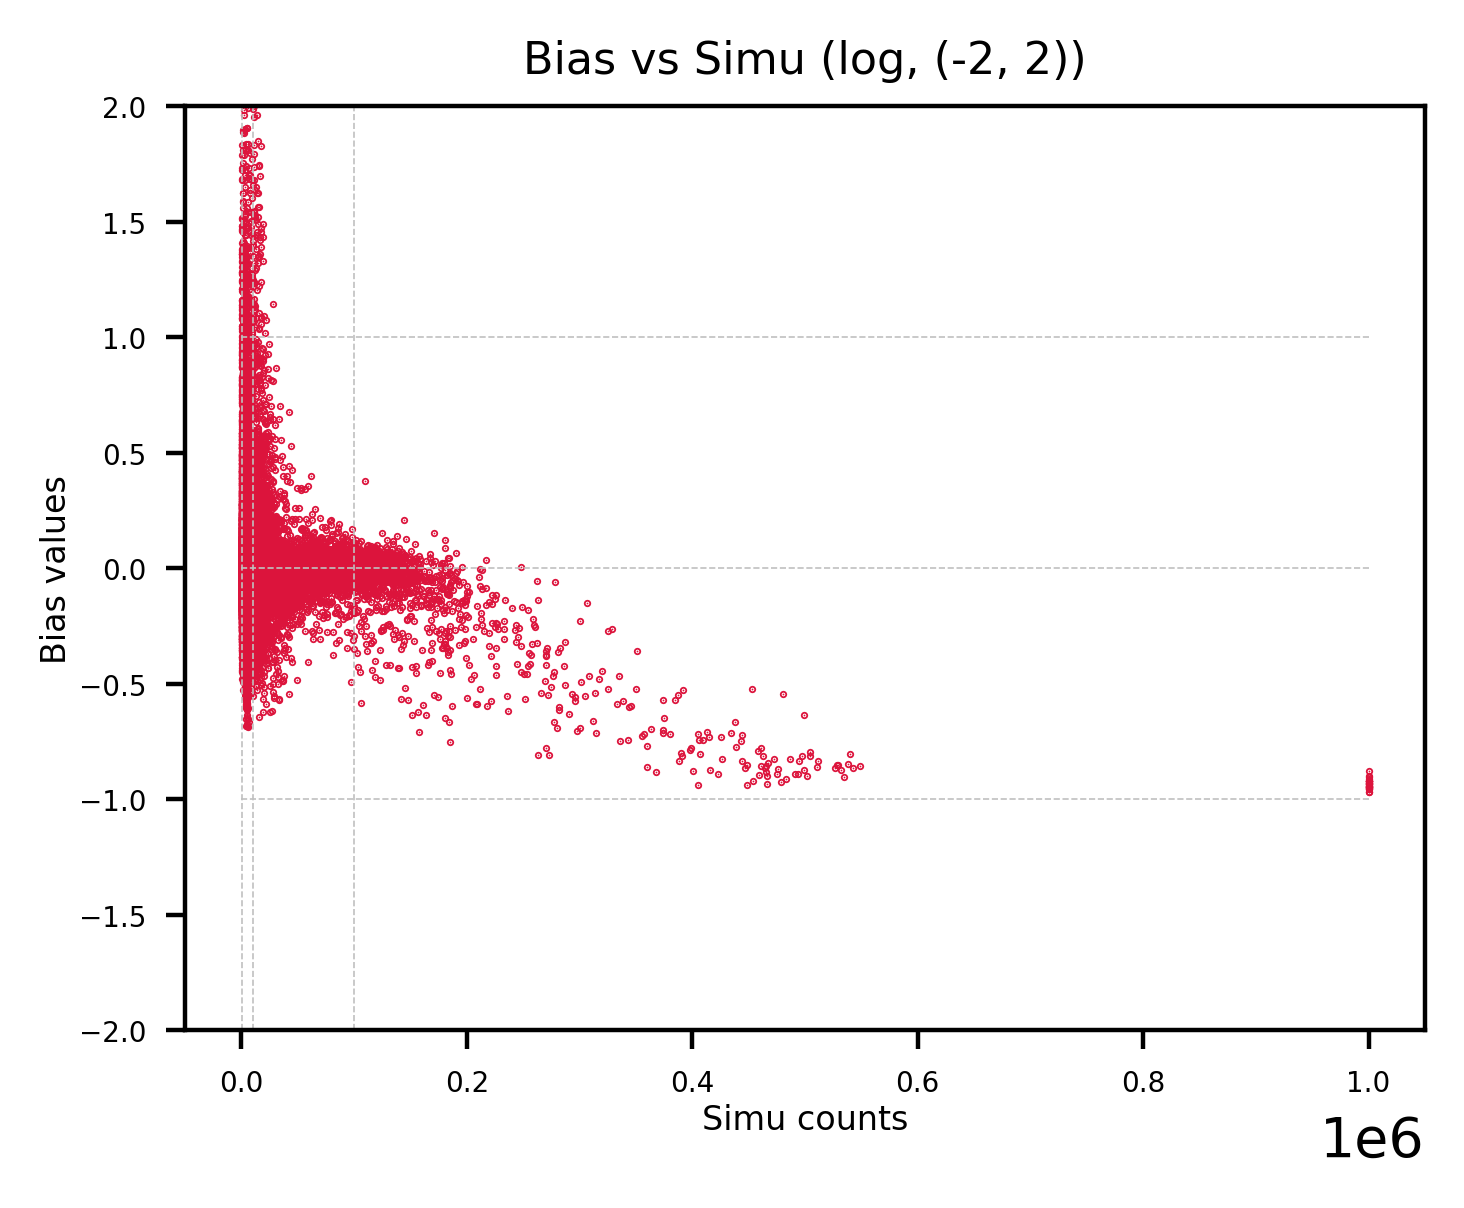

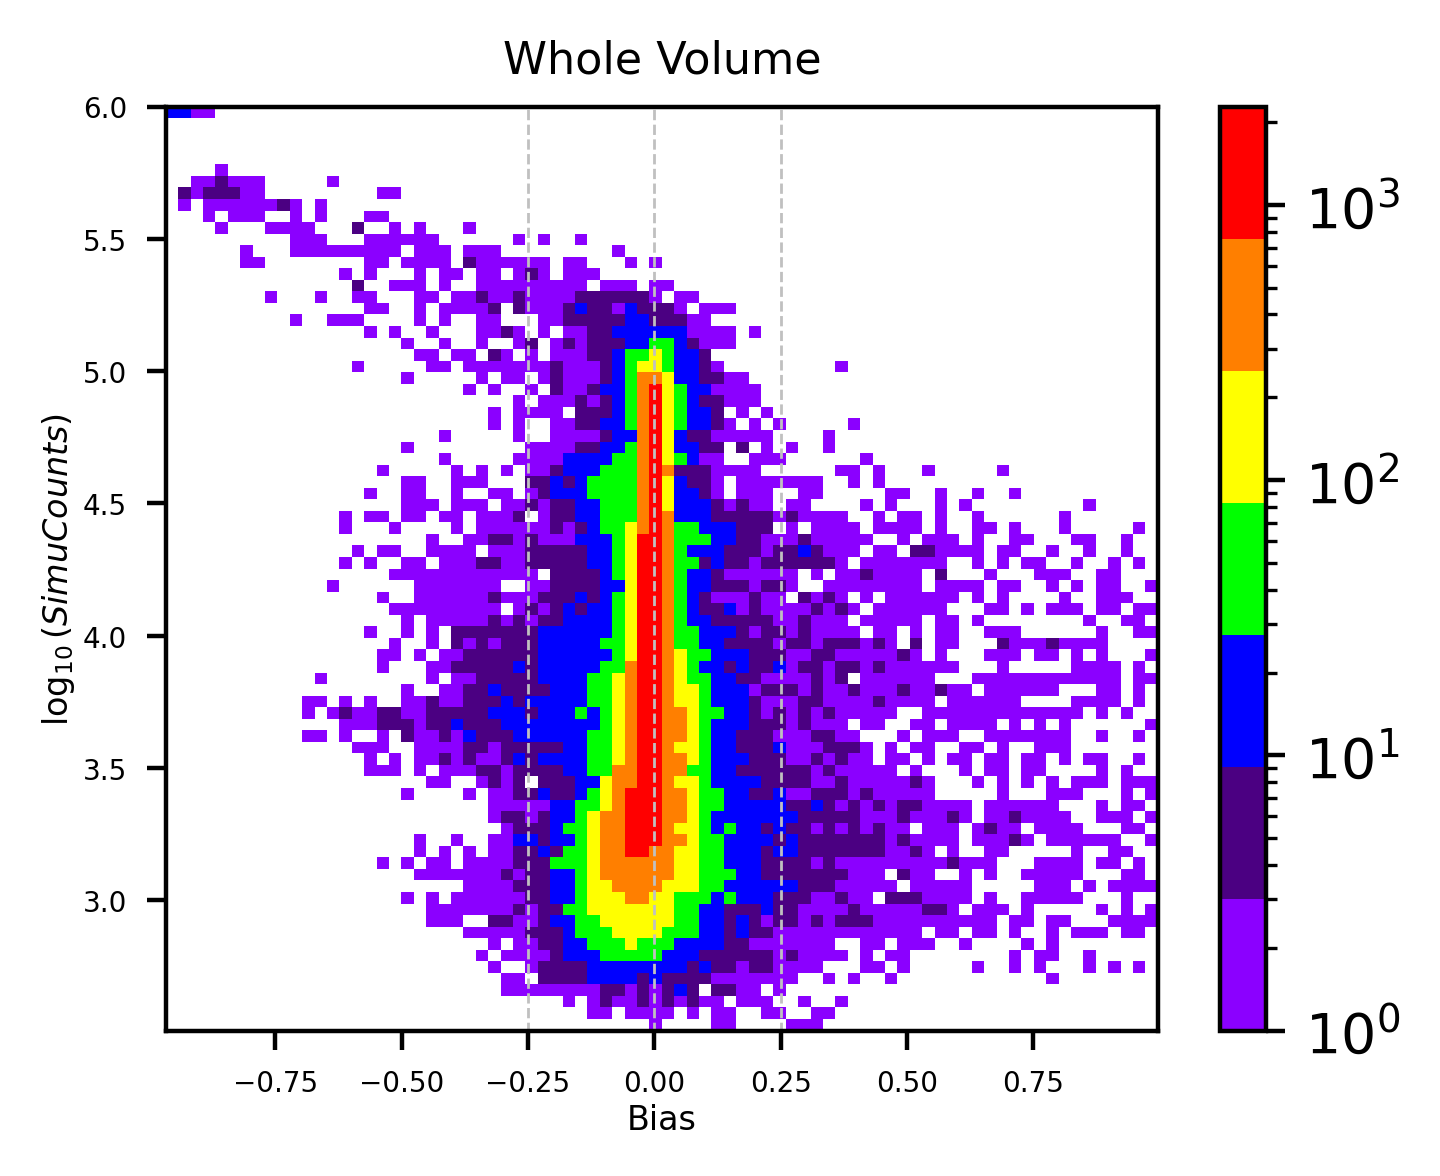

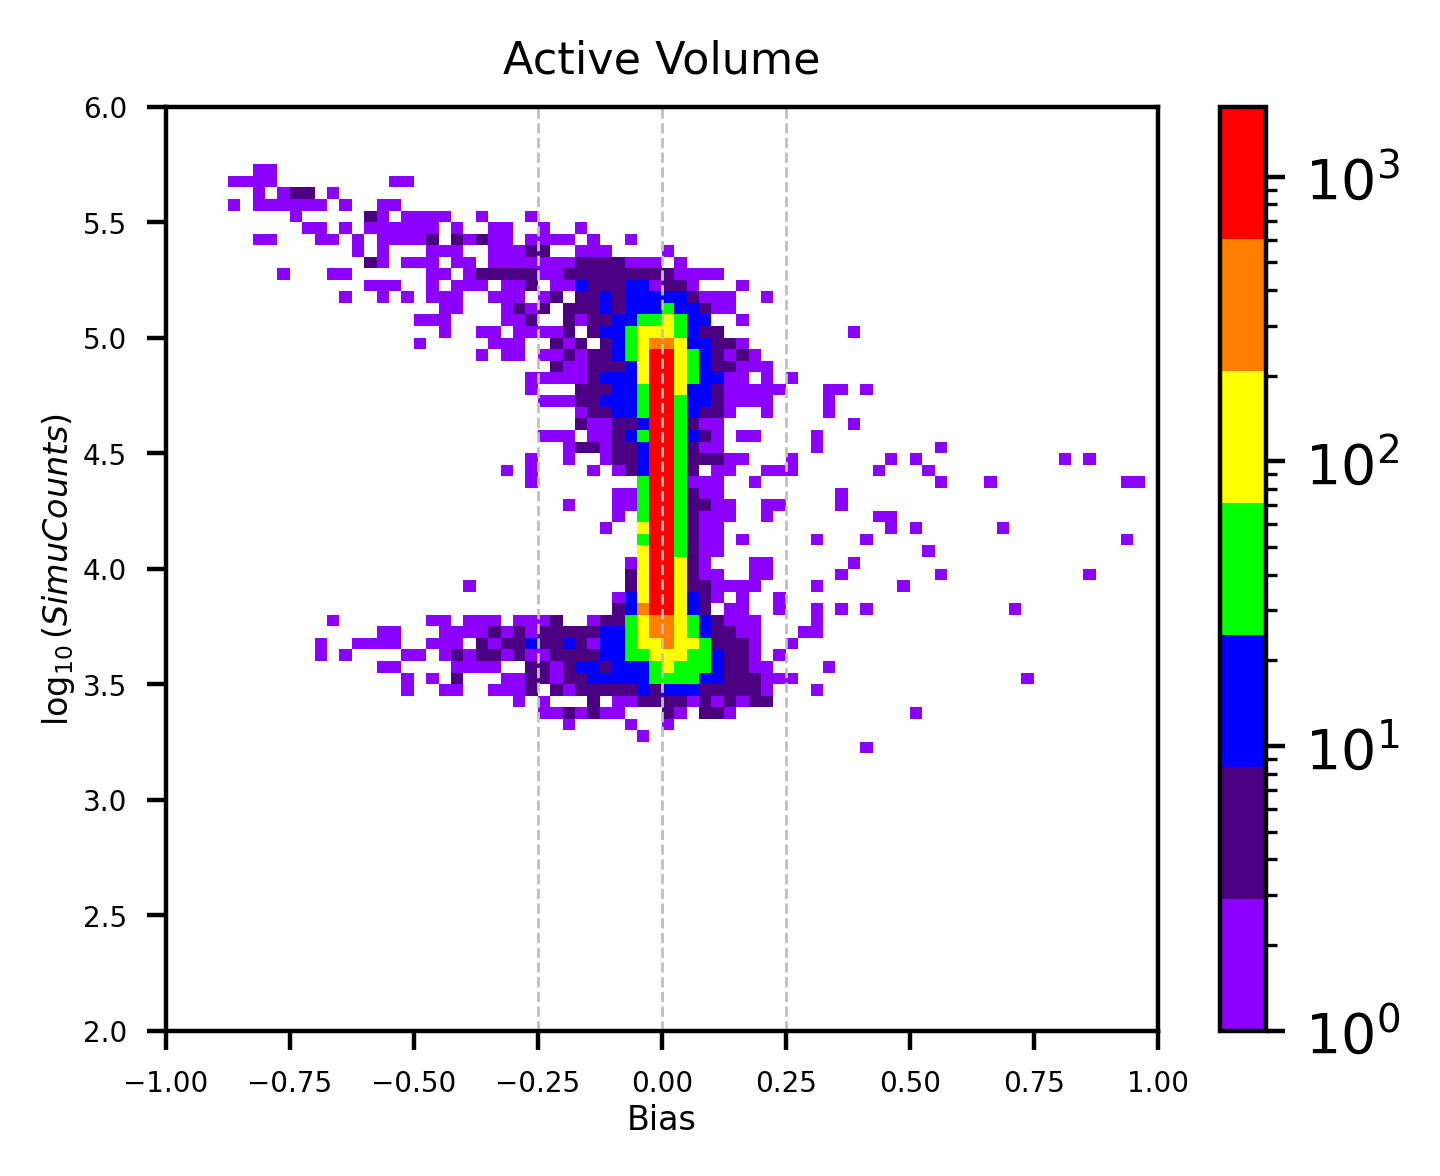

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap








#Bias vs Simu ( (-2, 2))=========================================
plt.figure(figsize=(4,3),dpi=400)

#y=x---
plt.plot([0, 1000000], [0, 0], color="silver", linewidth=0.3, linestyle='--')

plt.plot([1000, 1000], [-2, 2], color="silver", linewidth=0.3, linestyle='--')
plt.plot([10000, 10000], [-2, 2], color="silver", linewidth=0.3, linestyle='--')
plt.plot([100000, 100000], [-2, 2], color="silver", linewidth=0.3, linestyle='--')

plt.plot([0, 1000000], [-1, -1], color="silver", linewidth=0.3, linestyle='--')
plt.plot([0, 1000000], [1, 1], color="silver", linewidth=0.3, linestyle='--')


#Drawing of data points------
plt.scatter(simuValues, biasValues, c='crimson', s=0.4, alpha=1.0, marker='.', label='[1000, 10000]')

#plt.axis('scaled')
#plt.xlim(0, 600000)
plt.ylim(-2, 2)
plt.xlabel('Simu counts', labelpad=1, fontsize=6)
plt.ylabel('Bias values', labelpad=1, fontsize=6)
plt.tick_params(labelsize=5)#set the size of ticks---

#plt.xscale('log')

plt.title('Bias vs Simu (log, (-2, 2))', fontsize=8)


#Save the plot as a PNG file
#plt.savefig('bias_vs_simu.png', bbox_inches='tight')
plt.show() 






# Define discrete colors for a rainbow effect
colors = [
    '#8B00FF',   # Violet
    '#4B0082',  # Indigo
    '#0000FF',  # Blue
    '#00FF00',  # Green
    '#FFFF00',  # Yellow
    '#FF7F00',  # Orange
    '#FF0000'  # Red
]
# Create a discrete colormap
discrete_rainbow = ListedColormap(colors, name='discrete_rainbow')







#Bias vs log(Simu), (-1, 1), 2D histograms============================
plt.figure(figsize=(4,3),dpi=400)

plt.ylim(2, 6)
plt.xlim(-1, 1)

#y=x---
plt.plot([0, 0], [2, 6], color="silver", linewidth=0.5, linestyle='--')
plt.plot([-0.25, -0.25], [2, 6], color="silver", linewidth=0.5, linestyle='--')
plt.plot([0.25, 0.25], [2, 6], color="silver", linewidth=0.5, linestyle='--')



#plt.hist2d(logSimu, biasPN1, bins=(80, 80), cmap='plasma')
plt.hist2d(biasPN1, logSimu, bins=(80, 80), norm=LogNorm(), cmap=discrete_rainbow)
colorbar = plt.colorbar()


plt.ylabel(r'$\log_{10}(SimuCounts)$', labelpad=1, fontsize=6)
plt.xlabel('Bias', labelpad=1, fontsize=6)
plt.tick_params(labelsize=5)#set the size of ticks---

plt.title('Whole Volume', fontsize=8)

#Save the plot as a PNG file
#plt.savefig('bias_vs_simu.png', bbox_inches='tight')
plt.show() 







#Bias vs log(Simu), (-1, 1), 2D histograms============================
plt.figure(figsize=(4,3),dpi=400)

plt.ylim(2, 6)
plt.xlim(-1, 1)

#y=x---
plt.plot([0, 0], [2, 6], color="silver", linewidth=0.5, linestyle='--')
plt.plot([-0.25, -0.25], [2, 6], color="silver", linewidth=0.5, linestyle='--')
plt.plot([0.25, 0.25], [2, 6], color="silver", linewidth=0.5, linestyle='--')



#plt.hist2d(logSimu, biasPN1, bins=(80, 80), cmap='plasma')
plt.hist2d(activeNP1, activeSimuNP1, bins=(80, 80), range=[[-1, 1], [2, 6]],
           norm=LogNorm(), cmap=discrete_rainbow)
colorbar = plt.colorbar()


plt.ylabel(r'$\log_{10}(SimuCounts)$', labelpad=1, fontsize=6)
plt.xlabel('Bias', labelpad=1, fontsize=6)
plt.tick_params(labelsize=5)#set the size of ticks---

plt.title('Active Volume', fontsize=8)

#Save the plot as a PNG file
#plt.savefig('bias_vs_simu.png', bbox_inches='tight')
plt.show() 



<br />
<br />
<br />
<br />

### Explore Bias distributions (I):

In [12]:
import matplotlib.pyplot as plt
import numpy as np

activeNum = 0
x_red = []
y_red = []
z_red = []
x_magenta = []
y_magenta = []
z_magenta = []
x_cyan = []
y_cyan = []
z_cyan = []

#For active volume & -1<=bias<=1:
for i in range(0, len(simuValues)):
    x = posX[i]
    y = posY[i]
    z = posZ[i]
    bias = biasValues[i]
    simu = simuValues[i]

    if -355<x<355 and -5<y<615 and 0<z<460 and -1<=bias<=1: 
        activeNum += 1
        
        if -1 <= bias <= -0.2 and 100000 <= simu <= 1000000:
            x_red.append(x)
            y_red.append(y)
            z_red.append(z)
            
        elif -1 <= bias <= -0.2 and 1000 <= simu <= 10000:
            x_magenta.append(x)
            y_magenta.append(y)
            z_magenta.append(z)            

        elif 0.2 <= bias <= 1 and 10000 <= simu <= 1000000:
            x_cyan.append(x)
            y_cyan.append(y)
            z_cyan.append(z) 

    else:
        continue


print("#Events inside AV: ", activeNum)
print("#Bias (red)      : ", len(x_red), "({:.2f}%)".format(len(x_red)/activeNum*100))
print("#Bias (magenta)  : ", len(x_magenta), "({:.2f}%)".format(len(x_magenta)/activeNum*100))
print("#Bias (cyan)     : ", len(x_cyan), "({:.2f}%)".format(len(x_cyan)/activeNum*100))



#Events inside AV:  68415
#Bias (red)      :  233 (0.34%)
#Bias (magenta)  :  177 (0.26%)
#Bias (cyan)     :  54 (0.08%)


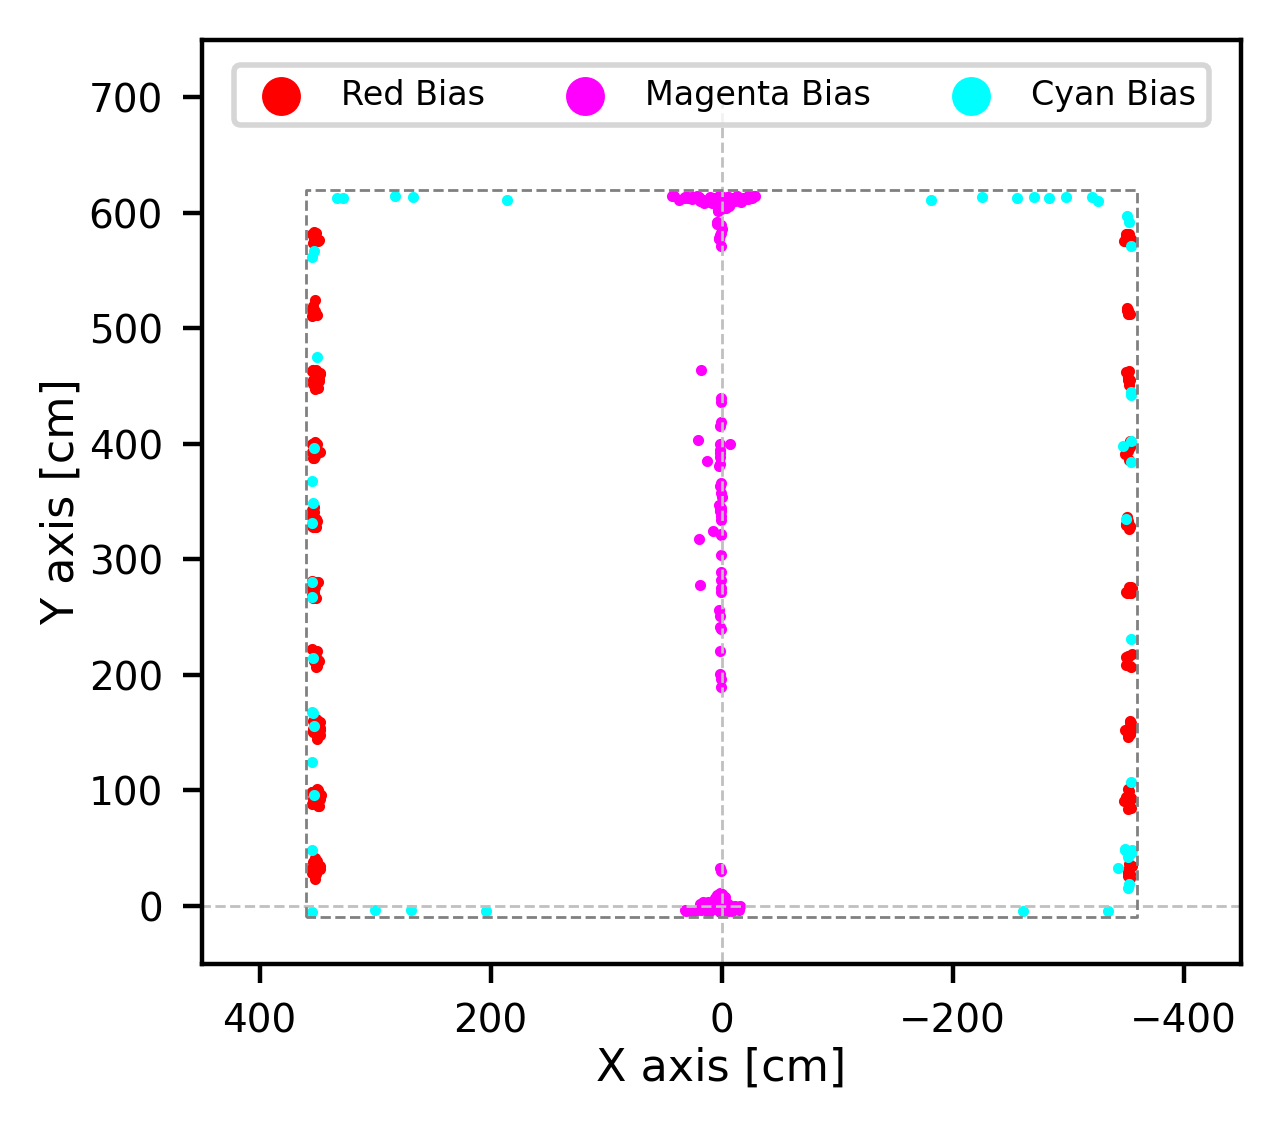

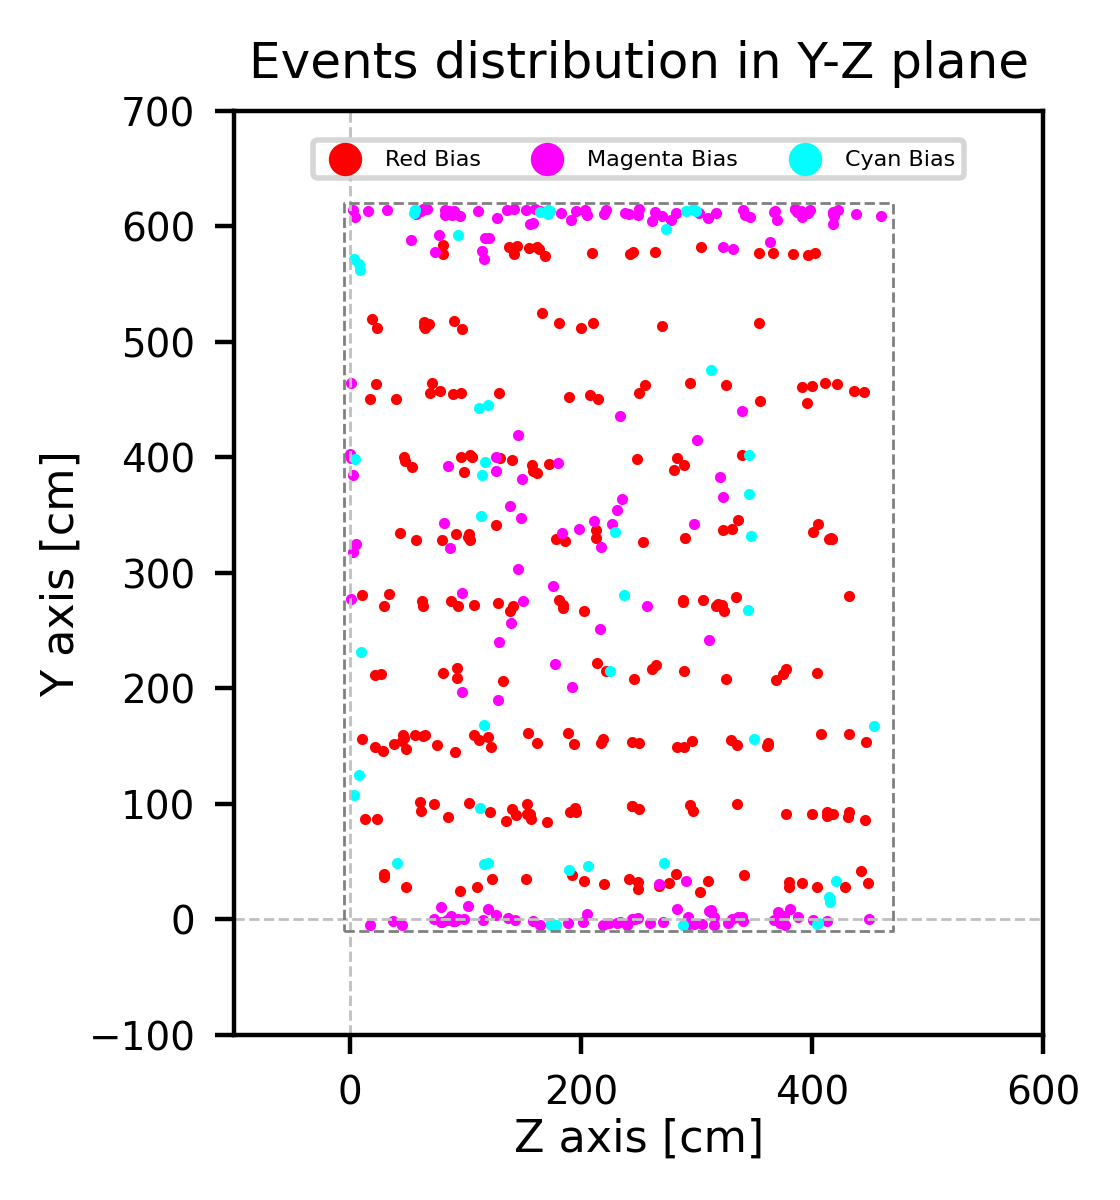

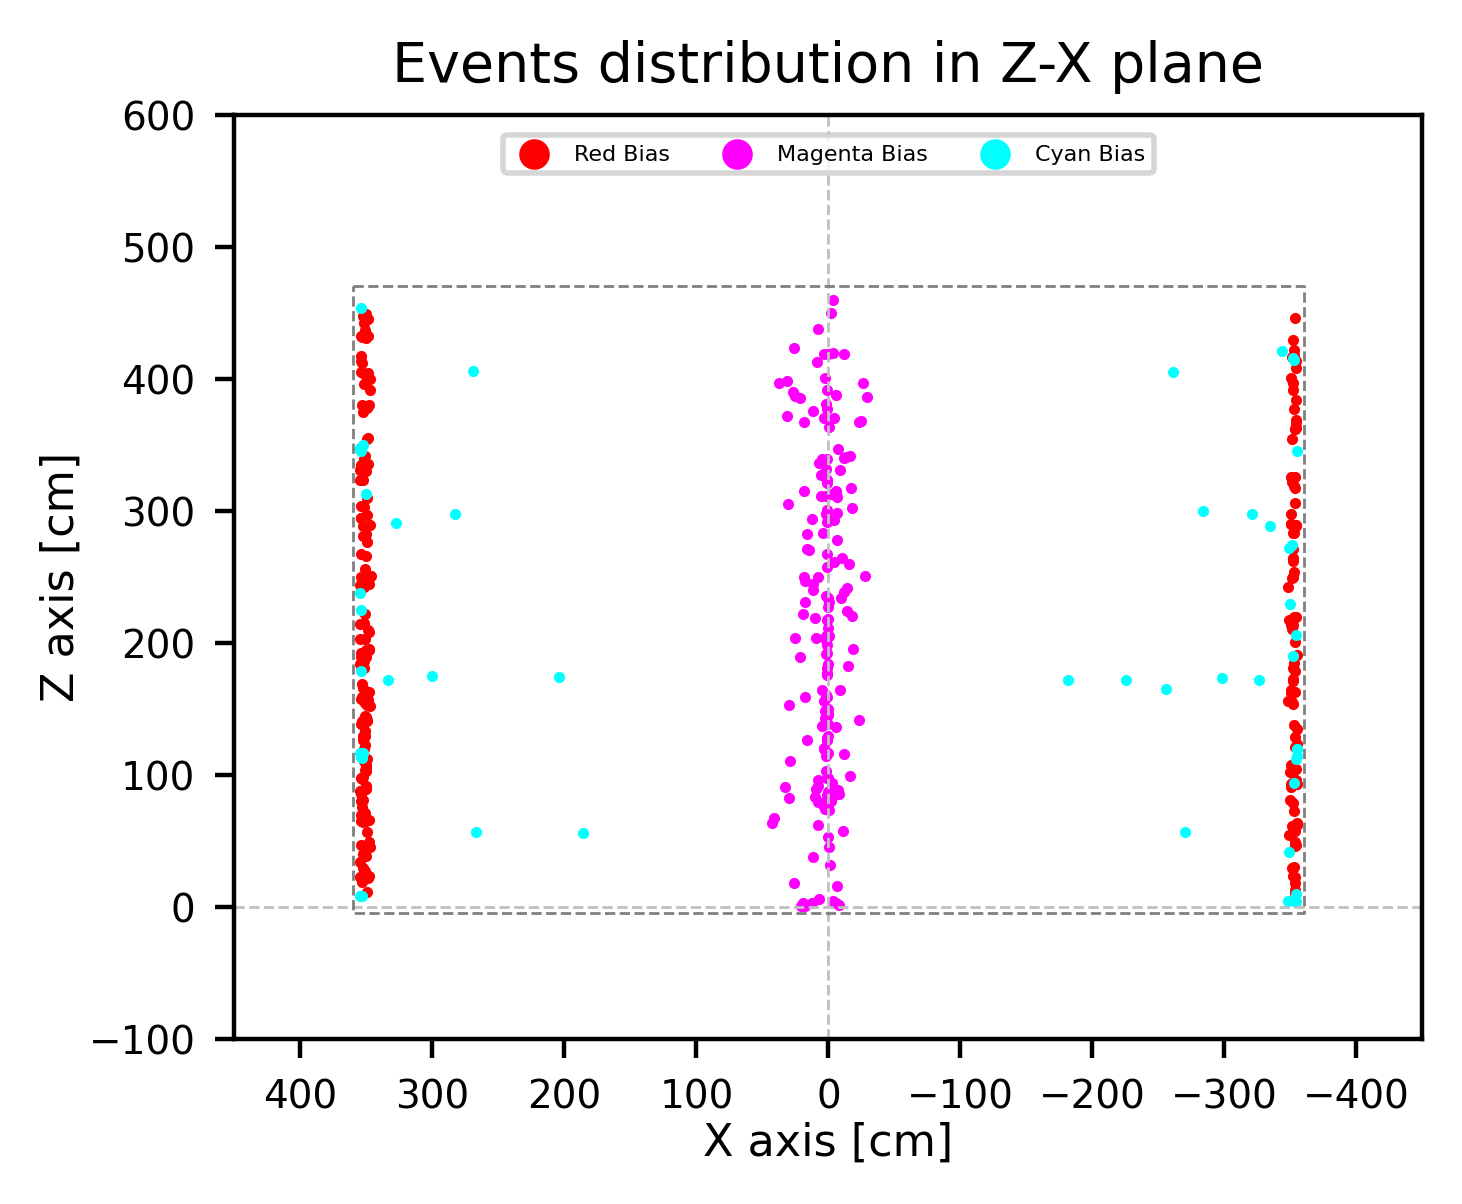

In [17]:
#Start drawing figures======================================    
#Set the limts of x, y and z when drawing---
xmin = -450
xmax = 450
ymin = -100
ymax = 700
zmin = -100
zmax = 600


#Y-X plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)

#Set equal scaling for both axes---
plt.axis('scaled')
plt.xlim(xmin, xmax)#Since in x-y plane, x axis is y of the geometry---
plt.ylim(ymin, ymax)

#auxiliary line, along y(geo) and x axis---
yauxi1 = [ymin, ymax]
yauxi2 = [0, 0]
plt.plot(yauxi2, yauxi1, color="silver", linewidth=0.5, linestyle='--')
xauxi1 = [0, 0]
xauxi2 = [xmin, xmax]
plt.plot(xauxi2, xauxi1, color="silver", linewidth=0.5, linestyle='--')

# Define the field cage frame, start from top right, anti-clockwise---
cageXY_y = [-10, 620, 620, -10, -10]
cageXY_x = [360, 360, -360, -360, 360]
plt.plot(cageXY_x, cageXY_y, color="grey", linewidth=0.5, linestyle='--')


#Drawing of data points------
plt.scatter(x_red, y_red, c='red', s=4.0, alpha=1.0, marker='.', label='Red Bias')
plt.scatter(x_magenta, y_magenta, c='magenta', s=4.0, alpha=1.0, marker='.', label='Magenta Bias')
plt.scatter(x_cyan, y_cyan, c='cyan', s=4.0, alpha=1.0, marker='.', label='Cyan Bias')


plt.xlabel('X axis [cm]', labelpad=1, fontsize=8)
plt.gca().invert_xaxis()
plt.ylabel('Y axis [cm]', labelpad=1, fontsize=8)
plt.ylim(-50, 750)

#plt.title('Events distribution in Y-X plane', fontsize=10)
plt.tick_params(labelsize=7)#set the size of ticks---
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), fontsize=8, markerscale=6, ncol=3, prop={'size': 6})

#Save the plot as a PNG file
#plt.savefig('simu_YX.png')
plt.show()    
#---------------------------------------------------------








#Y-Z plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)

#auxiliary line, along y(geo) and x axis---
yauxi3 = [ymin, ymax]
yauxi4 = [0, 0]
plt.plot(yauxi4, yauxi3, color="silver", linewidth=0.5, linestyle='--')
xauxi3 = [0, 0]
xauxi4 = [zmin, zmax]
plt.plot(xauxi4, xauxi3, color="silver", linewidth=0.5, linestyle='--')

# Define the field cage frame, start from top right, anti-clockwise---
cageXZ_z = [-5, 470, 470, -5, -5]
cageXZ_y = [-10, -10, 620, 620, -10]
plt.plot(cageXZ_z, cageXZ_y, color="grey", linewidth=0.5, linestyle='--')


#Drawing of data points------
plt.scatter(z_red, y_red, c='red', s=4.0, alpha=1.0, marker='.', label='Red Bias')
plt.scatter(z_magenta, y_magenta, c='magenta', s=4.0, alpha=1.0, marker='.', label='Magenta Bias')
plt.scatter(z_cyan, y_cyan, c='cyan', s=4.0, alpha=1.0, marker='.', label='Cyan Bias')



plt.axis('scaled')
plt.xlim(zmin, zmax)
plt.ylim(ymin, ymax)
plt.xlabel('Z axis [cm]', labelpad=1, fontsize=8)
plt.ylabel('Y axis [cm]', labelpad=1, fontsize=8)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.title('Events distribution in Y-Z plane', fontsize=9)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), fontsize=7, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('simu_YZ.png')
plt.show()    
#---------------------------------------------------------






#Z-X plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)

#auxiliary line, along y(geo) axis---
yauxi5 = [zmin, zmax]
yauxi6 = [0, 0]
plt.plot(yauxi6, yauxi5, color="silver", linewidth=0.5, linestyle='--')
xauxi5= [0, 0]
xauxi6 = [xmin, xmax]
plt.plot(xauxi6, xauxi5, color="silver", linewidth=0.5, linestyle='--')

# Define the field cage frame, start from top right, anti-clockwise---
cageZY_x = [360, -360, -360, 360, 360]
cageZY_z = [470, 470, -5, -5, 470]
plt.plot(cageZY_x, cageZY_z, color="grey", linewidth=0.5, linestyle='--')


#Drawing of data points------
plt.scatter(x_red, z_red, c='red', s=4.0, alpha=1.0, marker='.', label='Red Bias')
plt.scatter(x_magenta, z_magenta, c='magenta', s=4.0, alpha=1.0, marker='.', label='Magenta Bias')
plt.scatter(x_cyan, z_cyan, c='cyan', s=4.0, alpha=1.0, marker='.', label='Cyan Bias')




plt.axis('scaled')
plt.xlim(xmin, xmax)
plt.ylim(zmin, zmax)
plt.xlabel('X axis [cm]', labelpad=1, fontsize=8)
plt.gca().invert_xaxis()
plt.ylabel('Z axis [cm]', labelpad=1, fontsize=8)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.title('Events distribution in Z-X plane', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), fontsize=7, markerscale=4.5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('simu_ZX.png')
plt.show()    
#---------------------------------------------------------

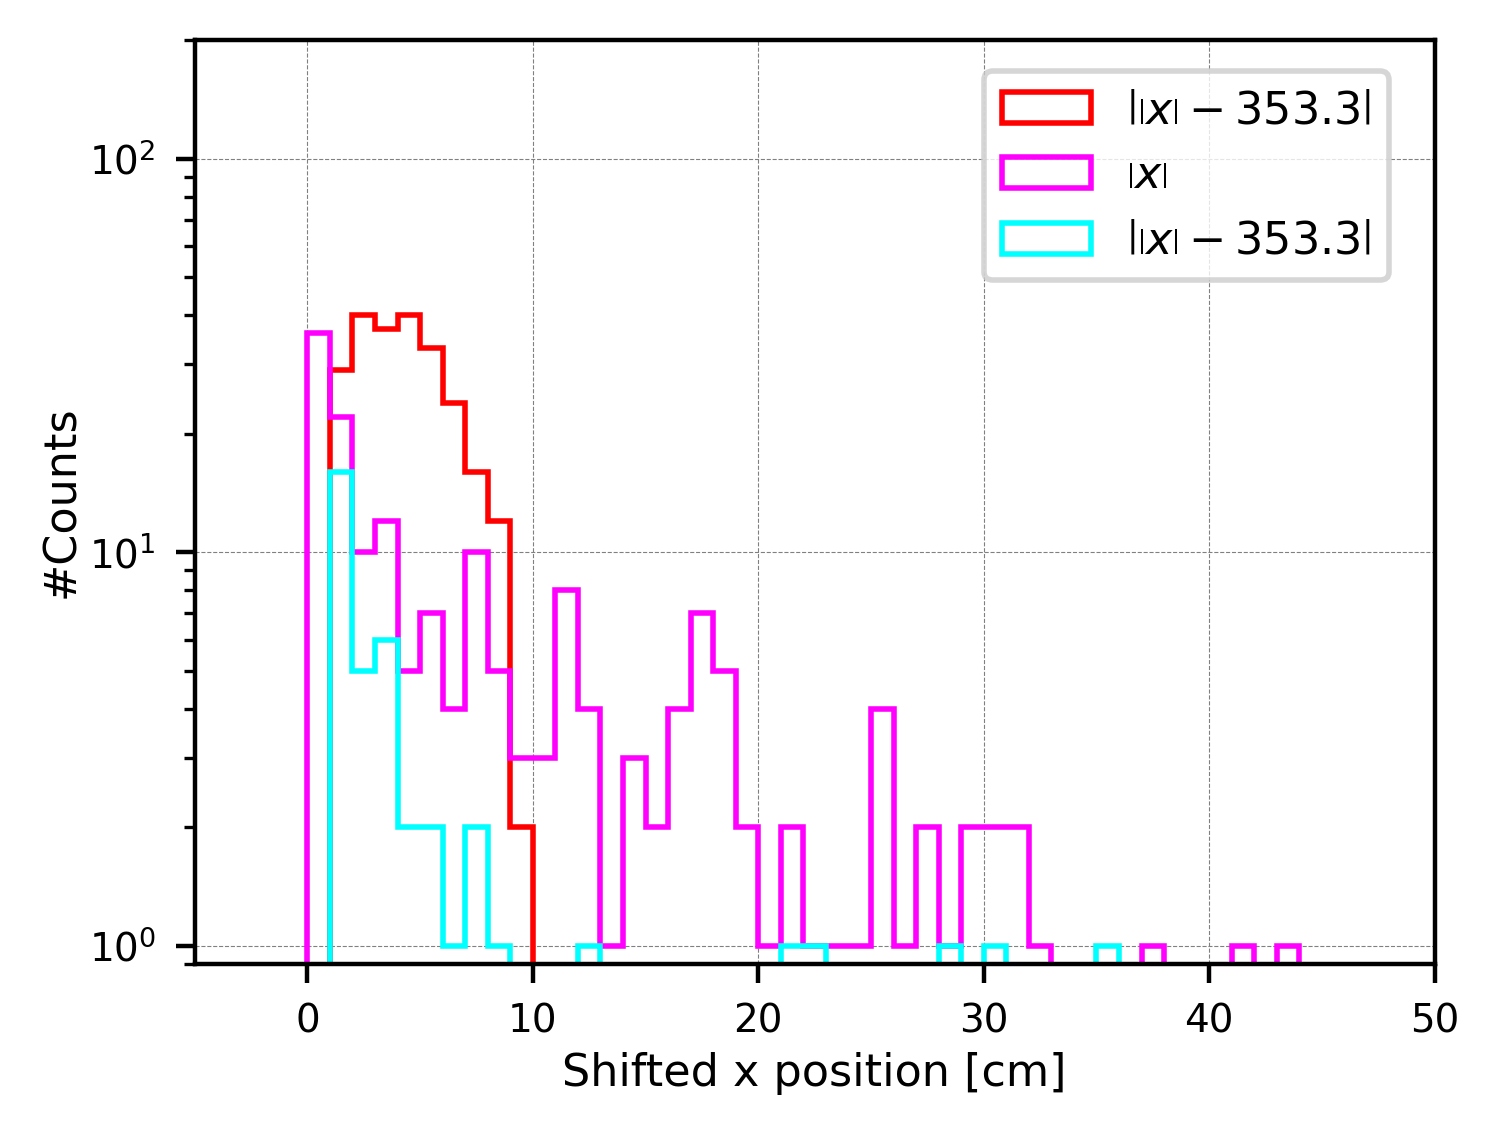

In [14]:
#Dsitribution of X:

x_magenta_cut = []
for i in range(0, len(x_magenta)):
    x = x_magenta[i]
    y = y_magenta[i]
    if 25<y<585: #field cage: y=-5 and y = 615
        x_magenta_cut.append(x)


#Get the absolute value then subtracted by 360:
group_red = [abs(abs(val) - 356.3) for val in x_red]
group_magenta = [abs(val) - 0 for val in x_magenta]
group_cyan = [abs(abs(val) - 356.3) for val in x_cyan]

group_magenta_cut = [abs(val) - 0 for val in x_magenta_cut]

#print("x_red: ", x_red)
#print("Shifted x_red: ", group_red)
#print("x_magenta: ", x_magenta)
#print("Shifted x_magenta: ", group_magenta)
#print("x_cyan: ", x_cyan)
#print("Shifted x_cyan: ", group_cyan)




# Plotting the histogram---------------
plt.figure(figsize=(4,3),dpi=400)

#Define the range and bin width
bin_width = 1
range_min = -5
range_max = 50
bins = np.arange(range_min, range_max + bin_width, bin_width)


plt.hist(group_red, bins=bins, range=(range_min, range_max), edgecolor='red', 
         histtype='step', label=r"$\left| \left| x \right| - 353.3 \right|$")
plt.hist(group_magenta, bins=bins, range=(range_min, range_max), edgecolor='magenta', 
         histtype='step', label=r"$\left| x \right|$")
plt.hist(group_cyan, bins=bins, range=(range_min, range_max), edgecolor='cyan', 
         histtype='step', label=r"$\left| \left| x \right| - 353.3 \right|$")

#plt.hist(group_magenta_cut, bins=bins, range=(range_min, range_max), edgecolor='magenta', 
#         histtype='step', linestyle='--', label=r"$\left| x \right|$ (Cut)")

plt.xlim(range_min, range_max)
plt.xlabel('Shifted x position [cm]', labelpad=2, fontsize=8)
plt.ylabel('#Counts', labelpad=1, fontsize=8)
plt.ylim(0.9, 200)
plt.yscale('log')
plt.tick_params(labelsize=7)#set the size of ticks---

#plt.title('E', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.8, 0.99), fontsize=8, markerscale=7, ncol=1, 
           prop={'size': 8})
plt.grid(color='gray', linestyle='--', linewidth=0.2, zorder=0)

#plt.savefig('simu_ZX.png')
plt.show()   


<br />
<br />

### Track-level evaluation:
<br />

field cage used here is in fact -360<x<360 and 0<y<620 and 0<z<460

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.colors import LogNorm


#Here I divided the field cage into 34*16 bins; x-z view, the size of the tube is 20cm*20cm---
binX = 36 #36 bins for x axis---
binZ = 23
binY = 31
binSize = 20 #10 or 20, which is better? Think again---









#SCAN in x-y plane========================================================
#20240526: Y-x plane!!!

#2D-array to store data and initialization---
simu_xy = [[0 for _ in range(binY)] for _ in range(binX)]#store photon num based on GEANT4---
emul_xy = [[0 for _ in range(binY)] for _ in range(binX)]#store photon num based on Graph module---

simuSum = 0
emulSum = 0
binVertex = 0

for i in range(0, binX):
    for j in range(0, binY):
        x_start = -360 + i*binSize
        x_end = x_start + binSize
        y_start = 0 + j*binSize
        y_end = y_start + binSize

        for event in range(0, len(posX)):
            x = posX[event]
            y = posY[event]
            simu = simuValues[event]
            emul = emulValues[event]

            if x_start <= x < x_end and y_start <= y < y_end:
                simuSum += simu
                emulSum += emul

                if i==7 and j==3:
                    binVertex += 1
                
        simu_xy[i][j] = simuSum
        emul_xy[i][j] = emulSum

        simuSum = 0
        emulSum = 0
        

biasXY_list = [] #used to store bias values---
bias_tmp = 0.0
np010 = 0

for i in range(0, binX):
    for j in range(0, binY):
        bias_tmp = (emul_xy[i][j]-simu_xy[i][j])/simu_xy[i][j]
        biasXY_list.append(bias_tmp)
        if -0.1 <= bias_tmp <= 0.1:
            np010 += 1
            
print("\nFor Y-X Plane scan=========================")
print("Total events num       : ", len(biasXY_list))
print("Events with |bias|<=0.1: ", np010, "({:.3f}%)".format(np010/len(biasXY_list)*100))
print("\nVertex num per event (cell): ", binVertex)








#SCAN in y-z plane========================================================
#20240526: Y-Z plane!!!

#2D-array to store data and initialization---
simu_yz = [[0 for _ in range(binZ)] for _ in range(binY)]#store photon num based on GEANT4---
emul_yz = [[0 for _ in range(binZ)] for _ in range(binY)]#store photon num based on Graph module---

simuSum = 0
emulSum = 0
binVertex = 0

for i in range(0, binY):
    for j in range(0, binZ):
        y_start = 0 + i*binSize
        y_end = y_start + binSize
        z_start = 0 + j*binSize
        z_end = z_start + binSize

        for event in range(0, len(posY)):
            y = posY[event]
            z = posZ[event]
            simu = simuValues[event]
            emul = emulValues[event]

            if y_start <= y < y_end and z_start <= z < z_end:
                simuSum += simu
                emulSum += emul

                if i==3 and j==7:
                    binVertex += 1
                
        simu_yz[i][j] = simuSum
        emul_yz[i][j] = emulSum

        simuSum = 0
        emulSum = 0     

biasYZ_list = [] #used to store bias values---
bias_tmp = 0.0
np010 = 0

for i in range(0, binY):
    for j in range(0, binZ):
        bias_tmp = (emul_yz[i][j]-simu_yz[i][j])/simu_yz[i][j]
        biasYZ_list.append(bias_tmp)
        if -0.1 <= bias_tmp <= 0.1:
            np010 += 1
            
print("\nFor Y-Z Plane scan=========================")
print("Total events num       : ", len(biasYZ_list))
print("Events with |bias|<=0.1: ", np010, "({:.3f}%)".format(np010/len(biasYZ_list)*100))
print("\nVertex num per event (cell): ", binVertex)










#SCAN in x-z plane========================================================
#20240526: z-x plane!!!

#2D-array to store data and initialization---
simu_xz = [[0 for _ in range(binZ)] for _ in range(binX)]#store photon num based on GEANT4---
emul_xz = [[0 for _ in range(binZ)] for _ in range(binX)]#store photon num based on Graph module---

simuSum = 0
emulSum = 0
binVertex = 0

for i in range(0, binX):
    for j in range(0, binZ):
        x_start = -360 + i*binSize
        x_end = x_start + binSize
        z_start = 0 + j*binSize
        z_end = z_start + binSize

        for event in range(0, len(posX)):
            x = posX[event]
            z = posZ[event]
            simu = simuValues[event]
            emul = emulValues[event]

            if x_start <= x < x_end and z_start <= z < z_end:
                simuSum += simu
                emulSum += emul

                if i==9 and j==9:#test vertex num per cell---
                    binVertex += 1
                
        simu_xz[i][j] = simuSum
        emul_xz[i][j] = emulSum

        simuSum = 0
        emulSum = 0
        

bias_list = [] #used to store bias values---
bias_tmp = 0.0
np010 = 0

for i in range(0, binX):
    for j in range(0, binZ):
        bias_tmp = (emul_xz[i][j]-simu_xz[i][j])/simu_xz[i][j]
        bias_list.append(bias_tmp)
        if -0.1 <= bias_tmp <= 0.1:
            np010 += 1
print("For Z-X Plane scan=========================")
print("Total events num       : ", len(bias_list))
print("Events with |bias|<=0.1: ", np010, "({:.3f}%)".format(np010/len(bias_list)*100))
print("\nVertex num per event (cell): ", binVertex)




For Y-X Plane scan=========================
Total events num       :  1116
Events with |bias|<=0.1:  1086 (97.312%)

Vertex num per event (cell):  112

For Y-Z Plane scan=========================
Total events num       :  713
Events with |bias|<=0.1:  641 (89.902%)

Vertex num per event (cell):  110
For Z-X Plane scan=========================
Total events num       :  828
Events with |bias|<=0.1:  790 (95.411%)

Vertex num per event (cell):  102


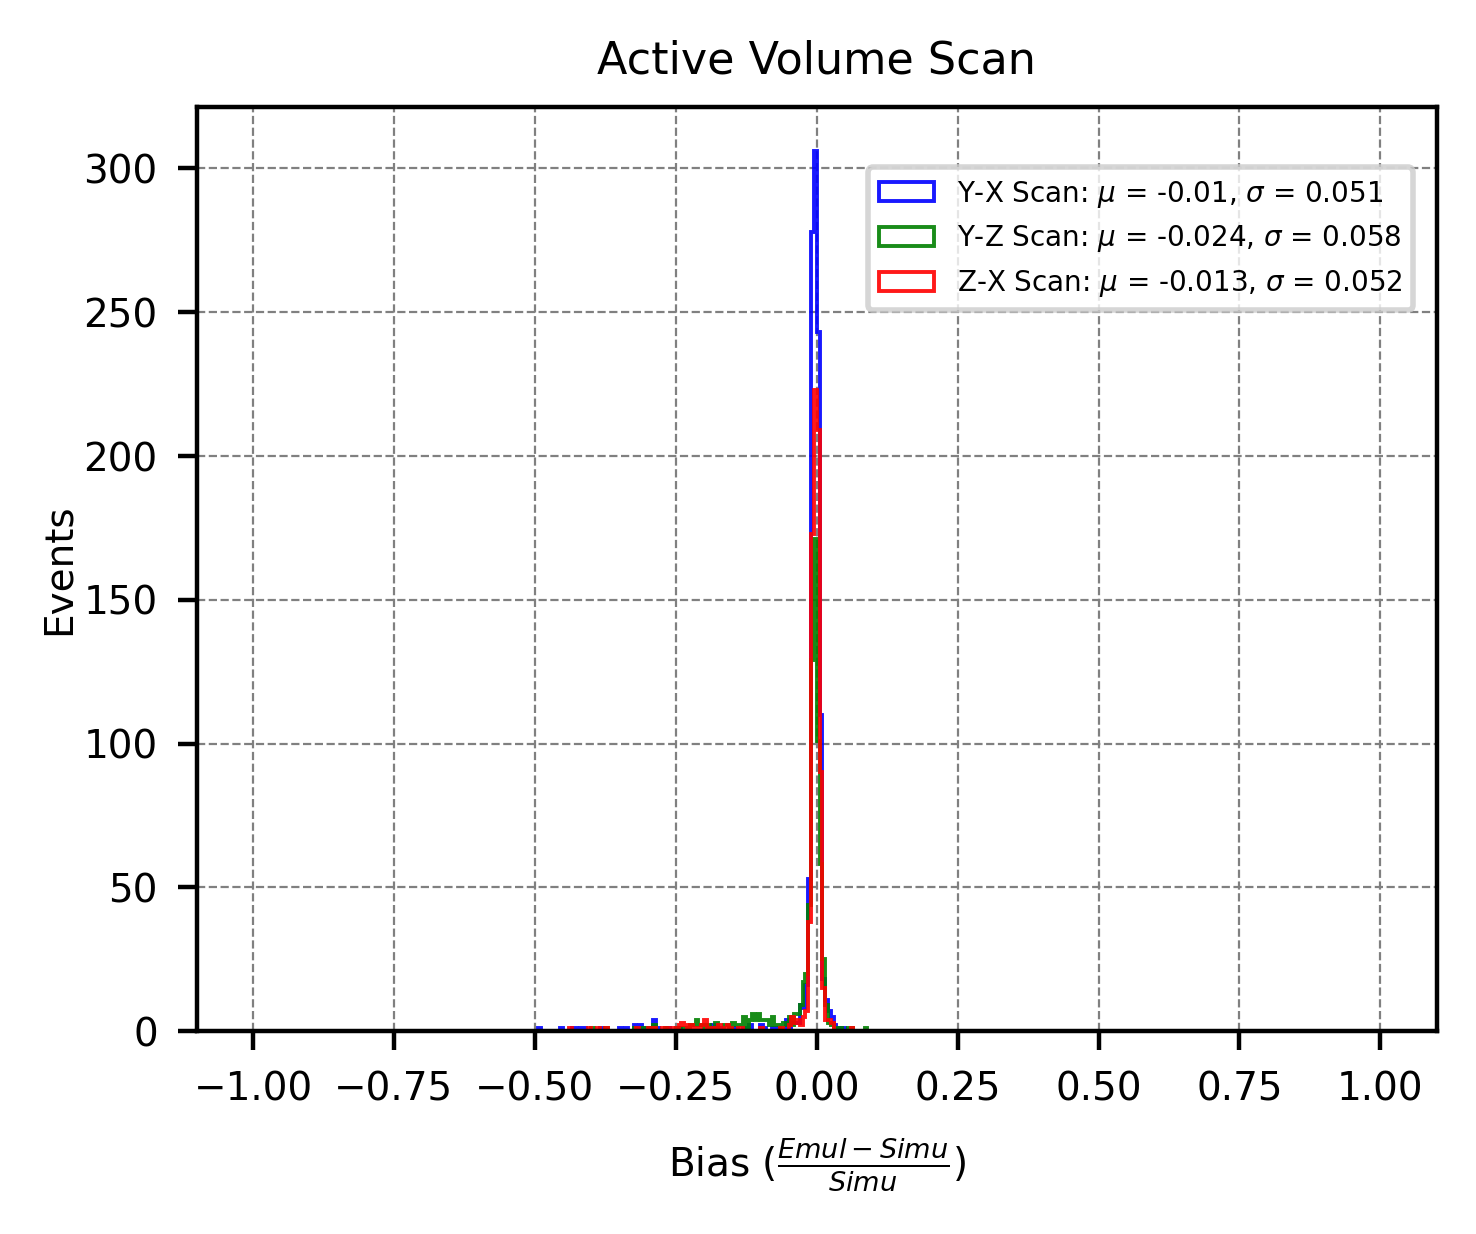

In [11]:
#Drawing========================================================================
plt.figure(figsize=(4,3),dpi=400)


meanXY = round(np.mean(biasXY_list), 3)#keep 3 decimals
stdXY = round(np.std(biasXY_list), 3)
plt.hist(biasXY_list, bins=400, range=(-1, 1), color='blue', alpha=0.9, histtype='step', edgecolor='blue', 
         linewidth=0.7, label='Y-X Scan: $\mu$ = {}, $\sigma$ = {}'.format(meanXY, stdXY))

meanYZ = round(np.mean(biasYZ_list), 3)#keep 3 decimals
stdYZ = round(np.std(biasYZ_list), 3)
plt.hist(biasYZ_list, bins=400, range=(-1, 1), color='green', alpha=0.9, histtype='step', edgecolor='green', 
         linewidth=0.7, label='Y-Z Scan: $\mu$ = {}, $\sigma$ = {}'.format(meanYZ, stdYZ))

mean = round(np.mean(bias_list), 3)#keep 3 decimals
std = round(np.std(bias_list), 3)
plt.hist(bias_list, bins=400, range=(-1, 1), color='red', alpha=0.9, histtype='step', edgecolor='red', 
         linewidth=0.7, label='Z-X Scan: $\mu$ = {}, $\sigma$ = {}'.format(mean, std))


plt.xlabel(r'Bias ($\frac{Emul-Simu}{Simu}$)', labelpad=5, fontsize=7)
plt.ylabel('Events', labelpad=1, fontsize=7)
plt.title('Active Volume Scan', fontsize=8)

plt.grid(color='gray', linestyle='--', linewidth=0.4, zorder=0)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.legend(loc='upper left', bbox_to_anchor=(0.53, 0.95), fontsize=7.5, markerscale=7.5, ncol=1, prop={'size': 5})

plt.show()

<br />
<br />
<br />
<br />

## Along drift direction (x):

In [12]:
#For the whole space------------------------------------

import matplotlib.pyplot as plt
import numpy as np

#Simple test---
print("Max of X :", round(max(posX), 2), "cm;  Min of X:", round(min(posX), 2), "cm")


rows = 42 #Number of bins along x direction
col = int(len(posY)/rows)*3
print("\nNum of bins: ", rows, " Size of each bin: ", col)


simuNumX_full = [[] for _ in range(rows)]#Store photon nums for different y
emulNumX_full = [[] for _ in range(rows)]


regionX = list(range(-380, 480, 20))#[-380, 460], step length = 20
binCenter_full = list(range(-370, 470, 20))#from -370 TO 450
print("\nSize of regionX  : ", len(regionX))
print(regionX)
print("\nSize of binCenter_full: ", len(binCenter_full))
print(binCenter_full)


for i in range(0, len(binCenter_full)):
    for j in range(0, len(posY)):
        x = posX[j]
        simu = simuValues[j]
        emul = emulValues[j]

        if regionX[i] <= x < regionX[i+1]:
            simuNumX_full[i].append(simu)
            emulNumX_full[i].append(emul)


print("\nSize of simuNumX: ", len(simuNumX_full[2]))

Max of X : 463.39 cm;  Min of X: -391.4 cm

Num of bins:  42  Size of each bin:  12435

Size of regionX  :  43
[-380, -360, -340, -320, -300, -280, -260, -240, -220, -200, -180, -160, -140, -120, -100, -80, -60, -40, -20, 0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460]

Size of binCenter_full:  42
[-370, -350, -330, -310, -290, -270, -250, -230, -210, -190, -170, -150, -130, -110, -90, -70, -50, -30, -10, 10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450]

Size of simuNumX:  4165


Vertex Num for each slice: 
 [4123, 4012, 4165, 4055, 3984, 4103, 4048, 4139, 4152, 4105, 4100, 4079, 4006, 4105, 4146, 4066, 4123, 4071, 3994, 4101, 4155, 4088, 4156, 4028, 4059, 4119, 4095, 4017, 4136, 4076, 3980, 4077, 3983, 4062, 4044, 4070, 3923, 4114, 4108, 4081, 4051, 3978]

Size of simuX_sum_full:  42 ; Size of emulNumX:  42
Size of vertexNum:  42 



<Figure size 1600x1200 with 0 Axes>

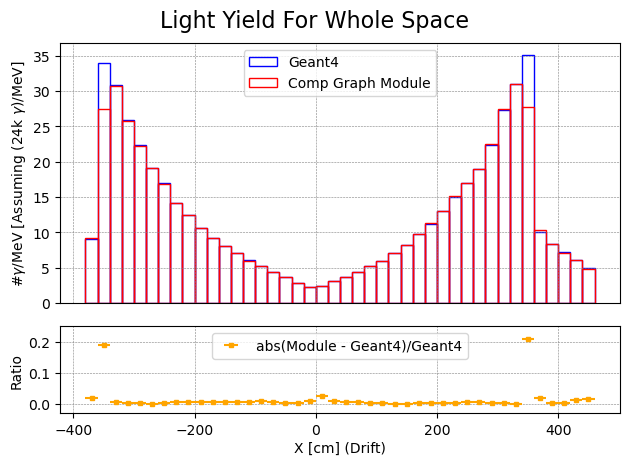

In [13]:
#For the whole space------------------------------------

#Pay attention: The above code should be executed before this block!!!


import matplotlib.pyplot as plt
import numpy as np


vertexNum = []#store vertex nums per slice or bin, simu emul the same---

simuX_sum_full = []#store summed photon nums per slice---
for row in simuNumX_full:
    row_sum = sum(row)
    size = len(row)
    simuX_sum_full.append(row_sum)
    vertexNum.append(size)

print("Vertex Num for each slice: \n", vertexNum)

emulX_sum_full = []#store summed photon nums per slice---
for row in emulNumX_full:
    row_sum = sum(row)
    emulX_sum_full.append(row_sum)

print("\nSize of simuX_sum_full: ", len(simuX_sum_full), "; Size of emulNumX: ", len(emulNumX_full))
print("Size of vertexNum: ", len(vertexNum), "\n")



#Scale, get the received photon nums for 1MeV energy deposit (1MeV ~ 24,000-photon emission)
for i in range(0, len(simuX_sum_full)):
    ratio = 24000/(vertexNum[i]*1000000)*0.03

    simuX_sum_full[i] = round(simuX_sum_full[i]*ratio, 2)
    emulX_sum_full[i] = round(emulX_sum_full[i]*ratio, 2)



#for i in range(0, 72):
#    print("simuX_sum: ", simuX_sum[i], "; emulX_sum: ", emulX_sum[i], 
#          ".  Ratio: ", round(simuX_sum[i]/emulX_sum[i]-1, 4))
#    print("Vertex Num per slice: ", vertexNum[i])



#Draw plot--------------------------------------------------------------------
plt.figure(figsize=(4,3),dpi=400)

#Create a figure and axes for histograms
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

plt.subplots_adjust(hspace=0.0)#Adjust the vertical spacing

#ax1-----------------------
ax1.bar(binCenter_full, simuX_sum_full, color='none', edgecolor='blue', linewidth=1, width=20, label="Geant4")
ax1.bar(binCenter_full, emulX_sum_full, color='none', edgecolor='red', linewidth=1, width=20, label="Comp Graph Module")

ax1.set_ylabel('#$\gamma$/MeV [Assuming (24k $\gamma$)/MeV]', labelpad=3, fontsize=10)
ax1.grid(color='gray', linestyle='--', linewidth=0.4, zorder=0)
ax1.legend()

#Set x-axis ticks at the bottom of the upper plot
ax1.tick_params(axis='x', bottom=False, top=False, labelbottom=False, labeltop=False)

#Move x-axis label to the bottom of the upper plot
ax1.xaxis.set_label_coords(0.5, -0.15)


#ax2------------------------
#ratio = np.array(emulX_sum_full)/np.array(simuX_sum_full)

emulX_sum_full = np.array(emulX_sum_full)
simuX_sum_full = np.array(simuX_sum_full)
ratio = np.abs(emulX_sum_full - simuX_sum_full) / simuX_sum_full


x_error = [10] * len(binCenter_full)

ax2.errorbar(binCenter_full, ratio, xerr=x_error, color='orange',marker='s', linestyle='', markersize=3,
         label="abs(Module - Geant4)/Geant4")

ax2.set_ylabel('Ratio', labelpad=3, fontsize=10)
ax2.set_ylim(-0.03, 0.25)
ax2.set_xlabel('X [cm] (Drift)', labelpad=3, fontsize=10)
ax2.grid(color='gray', linestyle='--', linewidth=0.4, zorder=0)
ax2.legend()

#Remove ticks at the bottom of the lower plot
ax2.tick_params(axis='x', which='both', bottom=True)


#Show the plot-----------------
title = plt.suptitle('Light Yield For Whole Space', fontsize=16)
title.set_position([.5, 0.96]) 
plt.tight_layout()

#plt.savefig('lightYield_Whole_drift.png')

plt.show()

In [14]:
#For the active space------------------------------------

import matplotlib.pyplot as plt
import numpy as np

#Boundaries of field cage: x: [-360, 360], y: [-10, 620], z: [-5, 470]


regionX = list(range(-360, 380, 20))#[-360, 360], 20 step length---
binCenter_active = list(range(-350, 370, 20))
print("\nSize of regionX_active  : ", len(regionX))
print("Size of binCenter_active: ", len(binCenter_active))


rows = len(binCenter_active)
simuNumX_active = [[] for _ in range(rows)]#Store photon nums for different x
emulNumX_active = [[] for _ in range(rows)]



for i in range(0, len(binCenter_active)):
    for j in range(0, len(posX)):
        x = posX[j]
        y = posY[j]
        z = posZ[j]
        simu = simuValues[j]
        emul = emulValues[j]

        if -355 < x < 355 and -5 < y < 615 and 0 < z < 460:        
            if regionX[i] <= x < regionX[i+1]:
                simuNumX_active[i].append(simu)
                emulNumX_active[i].append(emul)

        else:
            continue


for i in range(0, len(binCenter_active)):
    print("Size of simu per slice: ", len(simuNumX_active[i]), "; emul: ", len(emulNumX_active[i]))


Size of regionX_active  :  37
Size of binCenter_active:  36
Size of simu per slice:  1407 ; emul:  1407
Size of simu per slice:  1966 ; emul:  1966
Size of simu per slice:  1896 ; emul:  1896
Size of simu per slice:  1874 ; emul:  1874
Size of simu per slice:  1930 ; emul:  1930
Size of simu per slice:  1936 ; emul:  1936
Size of simu per slice:  1933 ; emul:  1933
Size of simu per slice:  1984 ; emul:  1984
Size of simu per slice:  1901 ; emul:  1901
Size of simu per slice:  1904 ; emul:  1904
Size of simu per slice:  1942 ; emul:  1942
Size of simu per slice:  1939 ; emul:  1939
Size of simu per slice:  1948 ; emul:  1948
Size of simu per slice:  2011 ; emul:  2011
Size of simu per slice:  1937 ; emul:  1937
Size of simu per slice:  1989 ; emul:  1989
Size of simu per slice:  1827 ; emul:  1827
Size of simu per slice:  1862 ; emul:  1862
Size of simu per slice:  1911 ; emul:  1911
Size of simu per slice:  2024 ; emul:  2024
Size of simu per slice:  1971 ; emul:  1971
Size of simu pe

Size of simuX_sum_active:  36 ; Size of emulNumX_active:  36
Size of vertexNum:  36 



<Figure size 1600x1200 with 0 Axes>

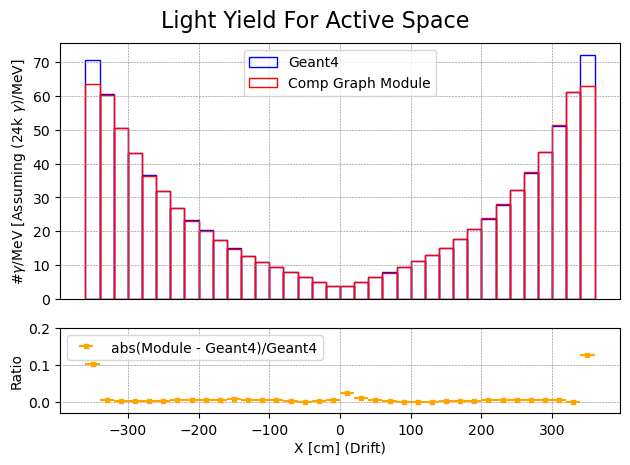

In [15]:
#For the Active space------------------------------------

#Pay attention: The above code should be executed before this one!!!


import matplotlib.pyplot as plt
import numpy as np


vertexNum = []#store vertex nums per slice, simu emul the same---

simuX_sum_active = []#store summed photon nums per slice---
for row in simuNumX_active:
    row_sum = sum(row)
    size = len(row)
    simuX_sum_active.append(row_sum)
    vertexNum.append(size)

emulX_sum_active = []#store summed photon nums per slice---
for row in emulNumX_active:
    row_sum = sum(row)
    emulX_sum_active.append(row_sum)

print("Size of simuX_sum_active: ", len(simuX_sum_active), "; Size of emulNumX_active: ", len(emulNumX_active))
print("Size of vertexNum: ", len(vertexNum), "\n")



#Scale, get the received photon nums for 1MeV energy deposit (1MeV ~ 24,000-photon emission)
for i in range(0, len(simuX_sum_active)):
    ratio = 24000/(vertexNum[i]*1000000)*0.03

    simuX_sum_active[i] = round(simuX_sum_active[i]*ratio, 2)
    emulX_sum_active[i] = round(emulX_sum_active[i]*ratio, 2)




#for i in range(0, 72):
#    print("simuX_sum: ", simuX_sum[i], "; emulX_sum: ", emulX_sum[i], 
#          ".  Ratio: ", round(simuX_sum[i]/emulX_sum[i]-1, 4))
#    print("Vertex Num per slice: ", vertexNum[i])



#Draw plot--------------------------------------------------------------------
plt.figure(figsize=(4,3),dpi=400)

#Create a figure and axes for histograms
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

plt.subplots_adjust(hspace=0.0)#Adjust the vertical spacing

#ax1-----------------------
ax1.bar(binCenter_active, simuX_sum_active, color='none', edgecolor='blue', linewidth=1, width=20, label="Geant4")
ax1.bar(binCenter_active, emulX_sum_active, color='none', edgecolor='red', linewidth=1, width=20, label="Comp Graph Module")

ax1.set_ylabel('#$\gamma$/MeV [Assuming (24k $\gamma$)/MeV]', labelpad=3, fontsize=10)
ax1.grid(color='gray', linestyle='--', linewidth=0.4, zorder=0)
ax1.legend()

#Set x-axis ticks at the bottom of the upper plot
ax1.tick_params(axis='x', bottom=False, top=False, labelbottom=False, labeltop=False)

#Move x-axis label to the bottom of the upper plot
ax1.xaxis.set_label_coords(0.5, -0.15)


#ax2------------------------
#ratio = np.array(emulX_sum_active)/np.array(simuX_sum_active)

emulX_sum_active = np.array(emulX_sum_active)
simuX_sum_active = np.array(simuX_sum_active)
ratio = np.abs(emulX_sum_active - simuX_sum_active) / simuX_sum_active

x_error = [10] * len(binCenter_active)

ax2.errorbar(binCenter_active, ratio, xerr=x_error, color='orange',marker='s', linestyle='', markersize=3,
         label="abs(Module - Geant4)/Geant4")

ax2.set_ylabel('Ratio', labelpad=3, fontsize=10)
ax2.set_ylim(-0.03, 0.2)
ax2.set_xlabel('X [cm] (Drift)', labelpad=3, fontsize=10)
ax2.grid(color='gray', linestyle='--', linewidth=0.4, zorder=0)
ax2.legend()

#Remove ticks at the bottom of the lower plot
ax2.tick_params(axis='x', which='both', bottom=True)


#Show the plot-----------------
title = plt.suptitle('Light Yield For Active Space', fontsize=16)
title.set_position([.5, 0.96]) 
plt.tight_layout()

#plt.savefig('lightYield_active_drift.png')

plt.show()

<br />
<br />
<br />
<br />

## Along drift direction (x):

In [16]:
#For the whole space------------------------------------

import matplotlib.pyplot as plt
import numpy as np

#Simple test---
print("Max of X :", round(max(posX), 2), "cm;  Min of X:", round(min(posX), 2), "cm")


rows = 42 #Number of bins along x direction
col = int(len(posY)/rows)*3
print("\nNum of bins: ", rows, " Size of each bin: ", col)


simuNumX_full = [[] for _ in range(rows)]#Store photon nums for different y
emulNumX_full = [[] for _ in range(rows)]


regionX = list(range(-380, 480, 20))#[-380, 460], step length = 20
binCenter_full = list(range(-370, 470, 20))#from -370 TO 450
print("\nSize of regionX  : ", len(regionX))
print(regionX)
print("\nSize of binCenter_full: ", len(binCenter_full))
print(binCenter_full)


for i in range(0, len(binCenter_full)):
    for j in range(0, len(posY)):
        x = posX[j]
        simu = simuValues[j]
        emul = emulValues[j]

        if regionX[i] <= x < regionX[i+1]:
            simuNumX_full[i].append(simu)
            emulNumX_full[i].append(emul)


print("\nSize of simuNumX: ", len(simuNumX_full[2]))

Max of X : 463.39 cm;  Min of X: -391.4 cm

Num of bins:  42  Size of each bin:  12435

Size of regionX  :  43
[-380, -360, -340, -320, -300, -280, -260, -240, -220, -200, -180, -160, -140, -120, -100, -80, -60, -40, -20, 0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460]

Size of binCenter_full:  42
[-370, -350, -330, -310, -290, -270, -250, -230, -210, -190, -170, -150, -130, -110, -90, -70, -50, -30, -10, 10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450]

Size of simuNumX:  4165


Vertex Num for each slice: 
 [4123, 4012, 4165, 4055, 3984, 4103, 4048, 4139, 4152, 4105, 4100, 4079, 4006, 4105, 4146, 4066, 4123, 4071, 3994, 4101, 4155, 4088, 4156, 4028, 4059, 4119, 4095, 4017, 4136, 4076, 3980, 4077, 3983, 4062, 4044, 4070, 3923, 4114, 4108, 4081, 4051, 3978]

Size of simuX_sum_full:  42 ; Size of emulNumX:  42
Size of vertexNum:  42 



<Figure size 1600x1200 with 0 Axes>

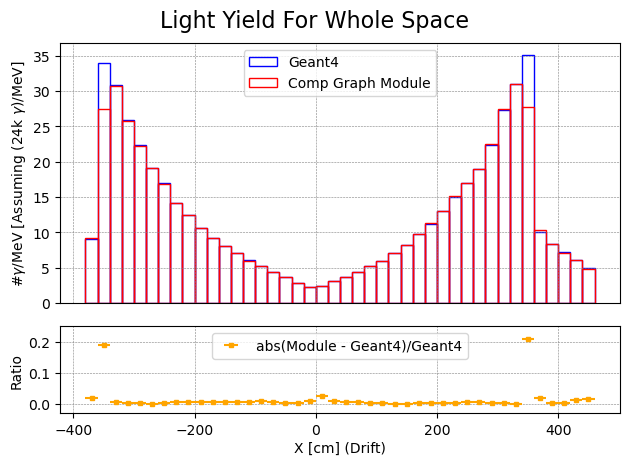

In [19]:
#For the whole space------------------------------------

#Pay attention: The above code should be executed before this block!!!


import matplotlib.pyplot as plt
import numpy as np


vertexNum = []#store vertex nums per slice or bin, simu emul the same---

simuX_sum_full = []#store summed photon nums per slice---
for row in simuNumX_full:
    row_sum = sum(row)
    size = len(row)
    simuX_sum_full.append(row_sum)
    vertexNum.append(size)

print("Vertex Num for each slice: \n", vertexNum)

emulX_sum_full = []#store summed photon nums per slice---
for row in emulNumX_full:
    row_sum = sum(row)
    emulX_sum_full.append(row_sum)

print("\nSize of simuX_sum_full: ", len(simuX_sum_full), "; Size of emulNumX: ", len(emulNumX_full))
print("Size of vertexNum: ", len(vertexNum), "\n")



#Scale, get the received photon nums for 1MeV energy deposit (1MeV ~ 24,000-photon emission)
for i in range(0, len(simuX_sum_full)):
    ratio = 24000/(vertexNum[i]*1000000)*0.03

    simuX_sum_full[i] = round(simuX_sum_full[i]*ratio, 2)
    emulX_sum_full[i] = round(emulX_sum_full[i]*ratio, 2)



#for i in range(0, 72):
#    print("simuX_sum: ", simuX_sum[i], "; emulX_sum: ", emulX_sum[i], 
#          ".  Ratio: ", round(simuX_sum[i]/emulX_sum[i]-1, 4))
#    print("Vertex Num per slice: ", vertexNum[i])



#Draw plot--------------------------------------------------------------------
plt.figure(figsize=(4,3),dpi=400)

#Create a figure and axes for histograms
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

plt.subplots_adjust(hspace=0.0)#Adjust the vertical spacing

#ax1-----------------------
ax1.bar(binCenter_full, simuX_sum_full, color='none', edgecolor='blue', linewidth=1, width=20, label="Geant4")
ax1.bar(binCenter_full, emulX_sum_full, color='none', edgecolor='red', linewidth=1, width=20, label="Comp Graph Module")

ax1.set_ylabel('#$\gamma$/MeV [Assuming (24k $\gamma$)/MeV]', labelpad=3, fontsize=10)
ax1.grid(color='gray', linestyle='--', linewidth=0.4, zorder=0)
ax1.legend()

#Set x-axis ticks at the bottom of the upper plot
ax1.tick_params(axis='x', bottom=False, top=False, labelbottom=False, labeltop=False)

#Move x-axis label to the bottom of the upper plot
ax1.xaxis.set_label_coords(0.5, -0.15)


#ax2------------------------
#ratio = np.array(emulX_sum_full)/np.array(simuX_sum_full)

emulX_sum_full = np.array(emulX_sum_full)
simuX_sum_full = np.array(simuX_sum_full)
ratio = np.abs(emulX_sum_full - simuX_sum_full) / simuX_sum_full


x_error = [10] * len(binCenter_full)

ax2.errorbar(binCenter_full, ratio, xerr=x_error, color='orange',marker='s', linestyle='', markersize=3,
         label="abs(Module - Geant4)/Geant4")

ax2.set_ylabel('Ratio', labelpad=3, fontsize=10)
ax2.set_ylim(-0.03, 0.25)
ax2.set_xlabel('X [cm] (Drift)', labelpad=3, fontsize=10)
ax2.grid(color='gray', linestyle='--', linewidth=0.4, zorder=0)
ax2.legend()

#Remove ticks at the bottom of the lower plot
ax2.tick_params(axis='x', which='both', bottom=True)


#Show the plot-----------------
title = plt.suptitle('Light Yield For Whole Space', fontsize=16)
title.set_position([.5, 0.96]) 
plt.tight_layout()

plt.savefig('lightYield_Whole_drift.png')

plt.show()


In [17]:
#For the active space------------------------------------

import matplotlib.pyplot as plt
import numpy as np

#Boundaries of field cage: x: [-360, 360], y: [-10, 620], z: [-5, 470]


regionX = list(range(-360, 380, 20))#[-360, 360], 20 step length---
binCenter_active = list(range(-350, 370, 20))
print("\nSize of regionX_active  : ", len(regionX))
print("Size of binCenter_active: ", len(binCenter_active))


rows = len(binCenter_active)
simuNumX_active = [[] for _ in range(rows)]#Store photon nums for different x
emulNumX_active = [[] for _ in range(rows)]



for i in range(0, len(binCenter_active)):
    for j in range(0, len(posX)):
        x = posX[j]
        y = posY[j]
        z = posZ[j]
        simu = simuValues[j]
        emul = emulValues[j]

        if -355 < x < 355 and -5 < y < 615 and 0 < z < 460:        
            if regionX[i] <= x < regionX[i+1]:
                simuNumX_active[i].append(simu)
                emulNumX_active[i].append(emul)

        else:
            continue


for i in range(0, len(binCenter_active)):
    print("Size of simu per slice: ", len(simuNumX_active[i]), "; emul: ", len(emulNumX_active[i]))


Size of regionX_active  :  37
Size of binCenter_active:  36
Size of simu per slice:  1407 ; emul:  1407
Size of simu per slice:  1966 ; emul:  1966
Size of simu per slice:  1896 ; emul:  1896
Size of simu per slice:  1874 ; emul:  1874
Size of simu per slice:  1930 ; emul:  1930
Size of simu per slice:  1936 ; emul:  1936
Size of simu per slice:  1933 ; emul:  1933
Size of simu per slice:  1984 ; emul:  1984
Size of simu per slice:  1901 ; emul:  1901
Size of simu per slice:  1904 ; emul:  1904
Size of simu per slice:  1942 ; emul:  1942
Size of simu per slice:  1939 ; emul:  1939
Size of simu per slice:  1948 ; emul:  1948
Size of simu per slice:  2011 ; emul:  2011
Size of simu per slice:  1937 ; emul:  1937
Size of simu per slice:  1989 ; emul:  1989
Size of simu per slice:  1827 ; emul:  1827
Size of simu per slice:  1862 ; emul:  1862
Size of simu per slice:  1911 ; emul:  1911
Size of simu per slice:  2024 ; emul:  2024
Size of simu per slice:  1971 ; emul:  1971
Size of simu pe

Size of simuX_sum_active:  36 ; Size of emulNumX_active:  36
Size of vertexNum:  36 



<Figure size 1600x1200 with 0 Axes>

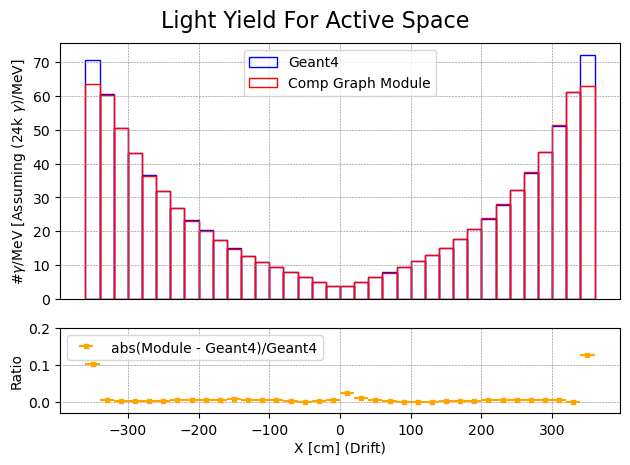

In [18]:
#For the Active space------------------------------------

#Pay attention: The above code should be executed before this one!!!


import matplotlib.pyplot as plt
import numpy as np


vertexNum = []#store vertex nums per slice, simu emul the same---

simuX_sum_active = []#store summed photon nums per slice---
for row in simuNumX_active:
    row_sum = sum(row)
    size = len(row)
    simuX_sum_active.append(row_sum)
    vertexNum.append(size)

emulX_sum_active = []#store summed photon nums per slice---
for row in emulNumX_active:
    row_sum = sum(row)
    emulX_sum_active.append(row_sum)

print("Size of simuX_sum_active: ", len(simuX_sum_active), "; Size of emulNumX_active: ", len(emulNumX_active))
print("Size of vertexNum: ", len(vertexNum), "\n")



#Scale, get the received photon nums for 1MeV energy deposit (1MeV ~ 24,000-photon emission)
for i in range(0, len(simuX_sum_active)):
    ratio = 24000/(vertexNum[i]*1000000)*0.03

    simuX_sum_active[i] = round(simuX_sum_active[i]*ratio, 2)
    emulX_sum_active[i] = round(emulX_sum_active[i]*ratio, 2)




#for i in range(0, 72):
#    print("simuX_sum: ", simuX_sum[i], "; emulX_sum: ", emulX_sum[i], 
#          ".  Ratio: ", round(simuX_sum[i]/emulX_sum[i]-1, 4))
#    print("Vertex Num per slice: ", vertexNum[i])



#Draw plot--------------------------------------------------------------------
plt.figure(figsize=(4,3),dpi=400)

#Create a figure and axes for histograms
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

plt.subplots_adjust(hspace=0.0)#Adjust the vertical spacing

#ax1-----------------------
ax1.bar(binCenter_active, simuX_sum_active, color='none', edgecolor='blue', linewidth=1, width=20, label="Geant4")
ax1.bar(binCenter_active, emulX_sum_active, color='none', edgecolor='red', linewidth=1, width=20, label="Comp Graph Module")

ax1.set_ylabel('#$\gamma$/MeV [Assuming (24k $\gamma$)/MeV]', labelpad=3, fontsize=10)
ax1.grid(color='gray', linestyle='--', linewidth=0.4, zorder=0)
ax1.legend()

#Set x-axis ticks at the bottom of the upper plot
ax1.tick_params(axis='x', bottom=False, top=False, labelbottom=False, labeltop=False)

#Move x-axis label to the bottom of the upper plot
ax1.xaxis.set_label_coords(0.5, -0.15)


#ax2------------------------
#ratio = np.array(emulX_sum_active)/np.array(simuX_sum_active)

emulX_sum_active = np.array(emulX_sum_active)
simuX_sum_active = np.array(simuX_sum_active)
ratio = np.abs(emulX_sum_active - simuX_sum_active) / simuX_sum_active

x_error = [10] * len(binCenter_active)

ax2.errorbar(binCenter_active, ratio, xerr=x_error, color='orange',marker='s', linestyle='', markersize=3,
         label="abs(Module - Geant4)/Geant4")

ax2.set_ylabel('Ratio', labelpad=3, fontsize=10)
ax2.set_ylim(-0.03, 0.2)
ax2.set_xlabel('X [cm] (Drift)', labelpad=3, fontsize=10)
ax2.grid(color='gray', linestyle='--', linewidth=0.4, zorder=0)
ax2.legend()

#Remove ticks at the bottom of the lower plot
ax2.tick_params(axis='x', which='both', bottom=True)


#Show the plot-----------------
title = plt.suptitle('Light Yield For Active Space', fontsize=16)
title.set_position([.5, 0.96]) 
plt.tight_layout()

plt.savefig('lightYield_active_drift.png')

plt.show()